Deep Learning
=============

Assignment 1
------------

The objective of this assignment is to learn about simple data curation practices, and familiarize you with some of the data we'll be reusing later.

This notebook uses the [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) dataset to be used with python experiments. This dataset is designed to look like the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, while looking a little more like real data: it's a harder task, and the data is a lot less 'clean' than MNIST.

In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

First, we'll download the dataset to our local machine. The data consists of characters rendered in a variety of fonts on a 28x28 image. The labels are limited to 'A' through 'J' (10 classes). The training set has about 500k and the testset 19000 labeled examples. Given these sizes, it should be possible to train models quickly on any machine.
Done.

In [6]:
url = 'https://commondatastorage.googleapis.com/books1000/'
last_percent_reported = None
data_root = '.' # Change me to store data elsewhere

def download_progress_hook(count, blockSize, totalSize):
  """A hook to report the progress of a download. This is mostly intended for users with
  slow internet connections. Reports every 5% change in download progress.
  """
  global last_percent_reported
  percent = int(count * blockSize * 100 / totalSize)

  if last_percent_reported != percent:
    if percent % 5 == 0:
      sys.stdout.write("%s%%" % percent)
      sys.stdout.flush()
    else:
      sys.stdout.write(".")
      sys.stdout.flush()
      
    last_percent_reported = percent
        
def maybe_download(filename, expected_bytes, force=False):
    """Download a file if not present, and make sure it's the right size."""
    dest_filename = os.path.join(data_root, filename)
    if force or not os.path.exists(dest_filename):
        print('Attempting to download:', filename) 
        filename, _ = urlretrieve(url + filename, dest_filename, reporthook=download_progress_hook)
        print('\nDownload Complete!')
    statinfo = os.stat(dest_filename)
    if statinfo.st_size == expected_bytes:
        print('Found and verified', dest_filename)
    else:
        raise Exception(
        'Failed to verify ' + dest_filename + '. Can you get to it with a browser?')
    return dest_filename

train_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043)

Found and verified ./notMNIST_large.tar.gz
Found and verified ./notMNIST_small.tar.gz


Extract the dataset from the compressed .tar.gz file.
This should give you a set of directories, labeled A through J.

In [7]:
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
    root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
    if os.path.isdir(root) and not force:
        # You may override by setting force=True.
        print('%s already present - Skipping extraction of %s.' % (root, filename))
    else:
        print('Extracting data for %s. This may take a while. Please wait.' % root)
        tar = tarfile.open(filename)
        sys.stdout.flush()
        tar.extractall(data_root)
        tar.close()
    data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root))
    if os.path.isdir(os.path.join(root, d))]
    if len(data_folders) != num_classes:
        raise Exception(
          'Expected %d folders, one per class. Found %d instead.' % (
            num_classes, len(data_folders)))
    print(data_folders)
    return data_folders
  
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

./notMNIST_large already present - Skipping extraction of ./notMNIST_large.tar.gz.
['./notMNIST_large/A', './notMNIST_large/B', './notMNIST_large/C', './notMNIST_large/D', './notMNIST_large/E', './notMNIST_large/F', './notMNIST_large/G', './notMNIST_large/H', './notMNIST_large/I', './notMNIST_large/J']
./notMNIST_small already present - Skipping extraction of ./notMNIST_small.tar.gz.
['./notMNIST_small/A', './notMNIST_small/B', './notMNIST_small/C', './notMNIST_small/D', './notMNIST_small/E', './notMNIST_small/F', './notMNIST_small/G', './notMNIST_small/H', './notMNIST_small/I', './notMNIST_small/J']


In [8]:
! ls './notMNIST_large/B'

a29ydW5pc2hpLnR0Zg==.png
a2F6b28udHRm.png
a2FkZW4udHRm.png
a2FpcmVlLnR0Zg==.png
a2Fua2FuYSBLLnR0Zg==.png
a2FuIEUudHRm.png
a2hhcm9uNGFfbWluaS50dGY=.png
a2l0Y2hlbiB0aWxlLnR0Zg==.png
a2ltaWRvcmkgbXVnY3VwLnR0Zg==.png
a2VhZ2FuLnR0Zg==.png
a2VtaWthbEhpLnR0Zg==.png
a2xvenpiYXRzLnR0Zg==.png
a3JvZWdlciAwNF81Ni50dGY=.png
a3JvZWdlciAwNF81NS50dGY=.png
a3JvZWdlciAwNF82Ni50dGY=.png
a3JvZWdlciAwNF82NS50dGY=.png
a3JvZWdlciAwNl81Ni50dGY=.png
a3JvZWdlciAwNl81NS50dGY=.png
a3JvZWdlciAwNl82My50dGY=.png
a3JvZWdlciAwNl82NC50dGY=.png
a3JvZWdlciAwNl82Ni50dGY=.png
a3JvZWdlciAwNl82NS50dGY=.png
a3JvZWdlciAwNV81My50dGY=.png
a3JvZWdlciAwNV81NC50dGY=.png
a3JvZWdlciAwNV81Ni50dGY=.png
a3JvZWdlciAwNV81NS50dGY=.png
a3JvZWdlciAwNV81Ny50dGY=.png
a3JvZWdlciAwNV81OC50dGY=.png
a3JvZWdlciAwNV82My50dGY=.png
a3JvZWdlciAwNV82NC50dGY=.png
a3JvZWdlciAwNV82Ni50dGY=.png
a3JvZWdlciAwNV82NS50dGY=.png
aG9tZWJveXNhcmViYWNraW50b3duLnR0Zg==.png
aG9tZXdvcmsgbm9ybWFsLnR0Zg==.png
aG9tZXdvcmsgc21hcnQudHRm.png
aG9uZXkgQm9sZC50dGY=.png
aG9uZXkg

Q2VudFNjaGJvb2sgQmRDbiBCVCBCb2xkLnR0Zg==.png
Q2VudFNjaGJvb2sgTW9ubyBCVC50dGY=.png
Q2VudG8gQ29uZGVuc2VkIE5vcm1hbC50dGY=.png
Q2VudG8gQ29uZGVuc2VkIEJvbGQudHRm.png
Q2VudG8gQ29uZGVuc2VkIEJvbGRJdGFsaWMudHRm.png
Q2VudG8gQ29uZGVuc2VkIEl0YWxpYy50dGY=.png
Q2VudG8gQm9sZC50dGY=.png
Q2VudG8gQm9sZEl0YWxpYy50dGY=.png
Q2VudG8gRXh0ZW5kZWQgQm9sZC50dGY=.png
Q2VudG8gRXh0ZW5kZWQgSXRhbGljLnR0Zg==.png
Q2VudG8gRXh0ZW5kZWQgTm9ybWFsLnR0Zg==.png
Q2VudG8gSXRhbGljLnR0Zg==.png
Q2VudG8gV2lkZSBCb2xkLnR0Zg==.png
Q2VudG8gV2lkZSBCb2xkSXRhbGljLnR0Zg==.png
Q2VudG8gV2lkZSBJdGFsaWMudHRm.png
Q2VudG8gV2lkZSBOb3JtYWwudHRm.png
Q2VudG8gVGhpbiBCb2xkLnR0Zg==.png
Q2VudG8gVGhpbiBCb2xkSXRhbGljLnR0Zg==.png
Q2VudG8gVGhpbiBJdGFsaWMudHRm.png
Q2VudG8gVGhpbiBOb3JtYWwudHRm.png
Q2VudGF1ci1Cb2xkLm90Zg==.png
Q2VudGF1ci1MaWdodC5vdGY=.png
Q2VudGF1ci1NZWRpdW0ub3Rm.png
Q2VudGF1ci1SZWd1bGFyLm90Zg==.png
Q2VudGF1ci50dGY=.png
Q2VudGF1ciBNVC50dGY=.png
Q2VudGF1ciBNVCBCb2xkLnR0Zg==.png
Q2VudGF1ciBNVCBCb2xkSXRhbGljLnR0Zg==.png
Q2VudGF1ciBNVCBJdGFsaWMudHRm

Q3JheW9uIEJvbGQgSXRhbGljLnR0Zg==.png
Q3JheW9uIEJvbGQudHRm.png
Q3JheW9uIEl0YWxpYy50dGY=.png
Q3JheW9uIEtpZHMgMi50dGY=.png
Q3JheW9uIEtpZHMgMS50dGY=.png
Q3JheW9uIFNsYW50ZWQudHRm.png
Q3JheW9uLnR0Zg==.png
Q3JheW9uLUNvbmRlbnNlZCBCb2xkIEl0YWxpYy50dGY=.png
Q3JheW9uLUNvbmRlbnNlZCBCb2xkLnR0Zg==.png
Q3JheW9uLUNvbmRlbnNlZCBJdGFsaWMudHRm.png
Q3JheW9uLUNvbmRlbnNlZCBOb3JtYWwudHRm.png
Q3JheW9uLUV4dGVuZGVkIE5vcm1hbC50dGY=.png
Q3JheW9uLUV4dGVuZGVkIEJvbGQgSXRhbGljLnR0Zg==.png
Q3JheW9uLUV4dGVuZGVkIEJvbGQudHRm.png
Q3JheW9uLUV4dGVuZGVkIEl0YWxpYy50dGY=.png
Q3JheW9uQ29uZGVuc2VkIFNsYW50ZWQudHRm.png
Q3JheW9uQ29uZGVuc2VkLnR0Zg==.png
Q3JheW9uRXh0ZW5kZWQgU2xhbnRlZC50dGY=.png
Q3JheW9uRXh0ZW5kZWQudHRm.png
Q3JhY2sgREVNTy50dGY=.png
Q3JhY2t3aG9yZS50dGY=.png
Q3JhY2tGaXIudHRm.png
Q3JhY2tkb3duIE8xIC1CUkstLnR0Zg==.png
Q3JhY2tkb3duIE8xIEJSSy50dGY=.png
Q3JhY2tkb3duIE8yIC1CUkstLnR0Zg==.png
Q3JhY2tkb3duIE8yIEJSSy50dGY=.png
Q3JhY2tkb3duIFIgQlJLLnR0Zg==.png
Q3JhY2tkb3duIFIyIEJSSy50dGY=.png
Q3JhY2tlZCBCcmFpbi50dGY=.png
Q3JhY2tlZCB

Qm9kb25pU2l4SVRDLUJvbGRPUy5vdGY=.png
Qm9kb25pU2l4SVRDU3RkLUJvb2sub3Rm.png
Qm9kb25pU2l4SVRDU3RkLUJvb2tJdGFsaWMub3Rm.png
Qm9kb25pU2l4SVRDU3RkLUJvbGRJdGFsaWMub3Rm.png
Qm9kb25pU2V2SVRDLUJvb2sub3Rm.png
Qm9kb25pU2V2SVRDLUJvb2tJdGFsT1Mub3Rm.png
Qm9kb25pU2V2SVRDLUJvb2tPUy5vdGY=.png
Qm9kb25pU2V2SVRDLUJvb2tTQy5vdGY=.png
Qm9kb25pU2V2SVRDLUJvbGQub3Rm.png
Qm9kb25pU2V2SVRDLUJvbGRJdGFsLm90Zg==.png
Qm9kb25pU2V2SVRDLUJvbGRJdGFsT1Mub3Rm.png
Qm9kb25pU2V2U3dhc2hJVEMtQm9sZEl0YWxpYy5vdGY=.png
Qm9kb25pU2V2U3dhc2hJVEMtQm9va0l0YWxpYy5vdGY=.png
Qm9kb25pU2V2ZW50eXR3b0VGLUJvb2sub3Rm.png
Qm9kb25pU2V2ZW50eXR3b0VGLUJvb2tTQy5vdGY=.png
Qm9kb25pU2V2ZW50eXR3b0VGLUJvbGQub3Rm.png
Qm9kb25pU2V2ZW50eXR3b0VGLUJvbGRJdGEub3Rm.png
Qm9kb25pU3RkLm90Zg==.png
Qm9kb25pU3RkLUJvb2sub3Rm.png
Qm9kb25pU3RkLUJvb2tJdGFsaWMub3Rm.png
Qm9kb25pU3RkLUJvbGQub3Rm.png
Qm9kb25pU3RkLUJvbGRDb25kZW5zZWQub3Rm.png
Qm9kb25pU3RkLUJvbGRJdGFsaWMub3Rm.png
Qm9kb25pU3RkLVBvc3Rlckl0YWxpYy5vdGY=.png
Qm9kb25pU3RkLVBvc3RlckNvbXByZXNzZWQub3Rm.png
Qm9kb25pU3ZudHl0d29

QmlnIEZpc2ggRW5zZW1ibGUudHRm.png
QmlnIFBsYWluLnR0Zg==.png
QmlnIFNreS50dGY=.png
QmlnIFNreSBSZWd1bGFyIHR0bm9ybS50dGY=.png
QmlnIFRvcC50dGY=.png
QmlnIFRydWNrLnR0Zg==.png
QmlnQ2FzbG9uLVJvbS5vdGY=.png
QmlnQ2FzbG9uLVNDYXAub3Rm.png
QmlnQ2hlZXNlRGFya0Eub3Rm.png
QmlnQ2hlZXNlRGFyay50dGY=.png
QmlnQ2hlZXNlRGFyayBSZWd1bGFyLnR0Zg==.png
QmlnQ2hlZXNlTGlnaHQgUmVndWxhci50dGY=.png
QmlnQ2hlZXNlTGlnaHQudHRm.png
QmlnQ2hlZXNlTGlnaHRBLm90Zg==.png
QmlnQ2x5ZGVHRC5wZmI=.png
QmlnQm90dG9tLnR0Zg==.png
QmlnQm9zc3kudHRm.png
QmlnQmVhdEJvbGQub3Rm.png
QmlnQmxhY2sub3Rm.png
QmlnQnJvdGhlclBlbi5vdGY=.png
QmlnQnJvdGhlclRleHRhLm90Zg==.png
QmlnQXBwbGUudHRm.png
QmlnRmVsbGEub3Rm.png
QmlnRmxpcnQudHRm.png
QmlnRWxsYS50dGY=.png
QmlnSGVhZE1vZm8udHRm.png
QmlnTm9vZGxlVGl0bGluZy50dGY=.png
QmlnTm9vZGxlVGl0bGluZyBPYmxpcXVlLnR0Zg==.png
QmlnTWlzdGVyQy50dGY=.png
QmlnUmVkREF5IE5vcm1hbC50dGY=.png
QmlnVG9wZS50dGY=.png
QmlnVGVudFBsYXllcnNORi50dGY=.png
QmlnYmFuZC50dGY=.png
QmlnYnJvdGhlci5vdGY=.png
QmlnZ2VuLnR0Zg==.png
Qmlqb3UgSkwudHRm.png
Qmlqb3V4

QnJpZW1TY3JpcHRTdGQtTWVkaXVtLm90Zg==.png
QnJpZW1TY3JpcHRTdGQtUmVndWxhci5vdGY=.png
QnJpZW1TY3JpcHRTdGQtVWx0cmEub3Rm.png
QnJva2dhdXogJiBFZnJvbi50dGY=.png
QnJva2dhdXogJiBFZnJvbiBJdGFsaWMudHRm.png
QnJva2UudHRm.png
QnJva2Vuc2NyaXB0LUJvbGQub3Rm.png
QnJva2Vuc2NyaXB0LUJvbGRDb25kLm90Zg==.png
QnJva2Vuc2NyaXB0LUJvbGRDb25kUm91Z2gub3Rm.png
QnJva2Vuc2NyaXB0LUJvbGRSb3VnaC5vdGY=.png
QnJva2VuIDE1LnR0Zg==.png
QnJva2VuIFBob25lIE5haWxzLnR0Zg==.png
QnJva2VuIFBsYW5ld2luZy50dGY=.png
QnJva2VuIFdpbmcudHRm.png
QnJva2VuIFN0aWNrLnR0Zg==.png
QnJva2VuIFRveXMudHRm.png
QnJva2VuLnR0Zg==.png
QnJva2VuNzQudHRm.png
QnJvay5vdGY=.png
QnJvb2tob3VzZS50dGY=.png
QnJvb2tob3VzZSBCb2xkIEl0YWxpYy50dGY=.png
QnJvb2tob3VzZSBCb2xkKDEpLnR0Zg==.png
QnJvb2tob3VzZSBIZWF2eS50dGY=.png
QnJvb2tob3VzZSBJdGFsaWMudHRm.png
QnJvb2tob3VzZSBMaWdodC50dGY=.png
QnJvb2tseW4gQm9sZC50dGY=.png
QnJvb2tseW4gQm9sZCBJdGFsaWMudHRm.png
QnJvb2tseW4gS2lkLnR0Zg==.png
QnJvb2tseW4gSXRhbGljLnR0Zg==.png
QnJvb2tseW4udHRm.png
QnJvb2tseW5LaWQub3Rm.png
QnJvb2ttYW5Td2FzaC50d

QWNyb3BvbGlzRXh0cmFzLm90Zg==.png
QWNyb3BvbGlzTm93Lm90Zg==.png
QWNyb3BvbGlzVGhlbi5vdGY=.png
QWphLnBmYg==.png
QWphQlEub3Rm.png
QWQgTGliIEJULnR0Zg==.png
QWQgTGliIElDRy50dGY=.png
QWQgTGliIFdpbjk1QlQoMSkudHRm.png
QWQgTGliLnBmYg==.png
QWR1cmVuLnR0Zg==.png
QWR2aXNvciBCbGFjayBTU2kgQmxhY2sgSXRhbGljLnR0Zg==.png
QWR2aXNvciBCbGFjayBTU2kgQmxhY2sudHRm.png
QWR2aXNvciBNZWRpdW0gU1NpIE1lZGl1bS50dGY=.png
QWR2aXNvciBNZWRpdW0gU1NpIE1lZGl1bSBJdGFsaWMudHRm.png
QWR2aXNvciBTU2kgQm9sZC50dGY=.png
QWR2aXNvciBTU2kgSXRhbGljLnR0Zg==.png
QWR2aXNvciBTU2kudHRm.png
QWR2ZW50dXJlciBCbGFjayBTRi50dGY=.png
QWR2ZW50dXJlciBCbGFjayBTRiBJdGFsaWMudHRm.png
QWR2ZW50dXJlIFN1YnRpdGxlcyBOb3JtYWwoMSkudHRm.png
QWR2ZW50dXJlIFN1YnRpdGxlcyBOb3JtYWwudHRm.png
QWR2ZW50dXJlLnR0Zg==.png
QWR2ZXJ0aXNlci50dGY=.png
QWR2ZXJ0aXNlcnMgR290aGljIExpZ2h0LnR0Zg==.png
QWR2ZXJ0aXNlcnMtQmxkLm90Zg==.png
QWR2ZXJ0aXNlcnNHb3RoaWMgSXRhbGljLnR0Zg==.png
QWR2ZXJ0aXNlcnNHb3RoaWMgUmVndWxhciBEQi50dGY=.png
QWR2ZXJ0aXNlcnNPdXRsaW5lLVJlZ3VsYXIudHRm.png
QWR2ZXJ0IEl0YWxpYy50

R2lsbFNhbnNJbmZhbnRTdGQub3Rm.png
R2lsbFNhbnNNVFByby1Cb29rLm90Zg==.png
R2lsbFNhbnNNVFByby1Cb29rSXRhbGljLm90Zg==.png
R2lsbFNhbnNNVFByby1Cb2xkQ29uZGVuc2VkLm90Zg==.png
R2lsbFNhbnNNVFByby1Cb2xkRXh0Q29uZC5vdGY=.png
R2lsbFNhbnNNVFByby1Cb2xkSXRhbGljLm90Zg==.png
R2lsbFNhbnNNVFByby1Db25kZW5zZWQub3Rm.png
R2lsbFNhbnNNVFByby1FeHRyYUJvbGQub3Rm.png
R2lsbFNhbnNNVFByby1IZWF2eS5vdGY=.png
R2lsbFNhbnNNVFByby1IZWF2eUl0YWxpYy5vdGY=.png
R2lsbFNhbnNNVFByby1MaWdodC5vdGY=.png
R2lsbFNhbnNNVFByby1MaWdodEl0YWxpYy5vdGY=.png
R2lsbFNhbnNNVFByby1NZWRpdW0ub3Rm.png
R2lsbFNhbnNNVFByby1VbHRyYUJvbGQub3Rm.png
R2lsbFNhbnNNVFByby1VbHRyYUJvbGRDb25kLm90Zg==.png
R2lsbFNhbnNNVFN0ZC1Cb29rLm90Zg==.png
R2lsbFNhbnNNVFN0ZC1Cb29rSXRhbGljLm90Zg==.png
R2lsbFNhbnNNVFN0ZC1Cb2xkRXh0Q29uZC5vdGY=.png
R2lsbFNhbnNNVFN0ZC1Cb2xkSXRhbGljLm90Zg==.png
R2lsbFNhbnNNVFN0ZC1IZWF2eUl0YWxpYy5vdGY=.png
R2lsbFNhbnNNVFN0ZC1MaWdodC5vdGY=.png
R2lsbFNhbnNNVFN0ZC1MaWdodEl0YWxpYy5vdGY=.png
R2lsbFNhbnNNVFN0ZC1NZWRpdW0ub3Rm.png
R2lsbFNhbnNNVFN0ZC1NZWRpdW1JdGFsaWMub

RG91YmxlT2hPbmUudHRm.png
RG91YmxlVHJvdWJsZS50dGY=.png
RG91YnQudHRm.png
RG91Z2xhcyBBZGFtcyBIYW5kLnR0Zg==.png
RG91Z2xhcyBIYW5kIE5vcm1hbC50dGY=.png
RG93biB0aGUgRHJhaW4udHRm.png
RG93biBUb3duIEF1dG8udHRm.png
RG93bldpbmQub3Rm.png
RG93bmNvbWUudHRm.png
RG93bndpbmQgUmVndWxhci50dGY=.png
RG96ZW4udHRm.png
RG9ia2luIEJvbGQgUGxhaW4udHRm.png
RG9ia2luIEV4IEJvbGQgUGxhaW4udHRm.png
RG9ia2luIFBsYWluLnR0Zg==.png
RG9ia2luIFdkIFBsYWluLnR0Zg==.png
RG9ia2luLVNjcmlwdC5vdGY=.png
RG9ia2luLVNjcmlwdCBSZWd1bGFyLnR0Zg==.png
RG9ia2luU2NyaXB0LnR0Zg==.png
RG9ibGVyLm90Zg==.png
RG9jdG9yIEF6dWwudHRm.png
RG9jdG9yLm90Zg==.png
RG9jdG9yQm9sZC5vdGY=.png
RG9jdG9ySmVreWxsLnR0Zg==.png
RG9kZ2UgQ2l0eSBJbml0aWFscy50dGY=.png
RG9kZ2VuYnVybkEudHRm.png
RG9kZ2VyIEl0YWxpYy50dGY=.png
RG9kZ2VyIENvbmRlbnNlZC50dGY=.png
RG9kZ2VyLnR0Zg==.png
RG9naG91c2UucGZi.png
RG9nbWEtQm9sZC50dGY=.png
RG9nbWEtQmxhY2sudHRm.png
RG9nbWEudHRm.png
RG9nbWFCb2xkIEJvbGQudHRm.png
RG9nbWFCbGFjay5vdGY=.png
RG9nbWFCbGFjayBSZWd1bGFyLnR0Zg==.png
RG9nbWFFeHRyYU91dGxpbmUgUmVnd

RHV0Y2ggNzY2LnBmYg==.png
RHV0Y2ggODA5IEJULnR0Zg==.png
RHV0Y2ggODA5IEJvbGQgQlQudHRm.png
RHV0Y2ggODA5IEJvbGQucGZi.png
RHV0Y2ggODA5IEl0YWxpYy5wZmI=.png
RHV0Y2ggODA5IEl0YWxpYyBCVC50dGY=.png
RHV0Y2ggODA5LnBmYg==.png
RHV0Y2ggODAxIEdyZWVrIEJULnR0Zg==.png
RHV0Y2ggODAxIEdyZWVrIEJvbGQgQlQudHRm.png
RHV0Y2ggODAxIEdyZWVrIEJvbGQgSW5jbGluZWQgQlQudHRm.png
RHV0Y2ggODAxIEdyZWVrIEluY2xpbmVkIEJULnR0Zg==.png
RHV0Y2ggODAxIEJvbGQgQlQudHRm.png
RHV0Y2ggODAxIEJvbGQgSXQgV2luOTVCVCgxKS50dGY=.png
RHV0Y2ggODAxIEJvbGQgSXRhbGljIEJULnR0Zg==.png
RHV0Y2ggODAxIEJvbGQgV2luOTVCVCgxKS50dGY=.png
RHV0Y2ggODAxIEJvbGQucGZi.png
RHV0Y2ggODAxIEl0YWxpYy5wZmI=.png
RHV0Y2ggODAxIEl0YWxpYyBCVC50dGY=.png
RHV0Y2ggODAxIEl0YWxpYyBIZWFkbGluZS5wZmI=.png
RHV0Y2ggODAxIEl0YWxpYyBIZWFkbGluZSBCVC50dGY=.png
RHV0Y2ggODAxIEl0YWxpYyBTV0EudHRm.png
RHV0Y2ggODAxIEl0YWxpYyBXaW45NUJUKDEpLnR0Zg==.png
RHV0Y2ggODAxIEN5cmlsbGljIEJULnR0Zg==.png
RHV0Y2ggODAxIEV4dHJhIEJvbGQgQlQudHRm.png
RHV0Y2ggODAxIEV4dHJhIEJvbGQgSXRhbGljLnBmYg==.png
RHV0Y2ggODAxIEV4dHJhIEJvbGQ

RmxhbmdlQlEtQm9sZEl0YWxpYy5vdGY=.png
RmxhbmdlQlEtSXRhbGljLm90Zg==.png
RmxhbmdlQlEtTGlnaHRJdGFsaWMub3Rm.png
RmxhbmdlQlEtTWVkaXVtLm90Zg==.png
RmxhbmdlQlEtTWVkaXVtSXRhbGljLm90Zg==.png
RmxhbmdlQlEtUmVndWxhci5vdGY=.png
RmxhbW1lU3RkLm90Zg==.png
RmxhbWEtQm9sZC5vdGY=.png
RmxhbWEtQm9sZEl0YWxpYy5vdGY=.png
RmxhbWEub3Rm.png
RmxhbWFCb29rLm90Zg==.png
RmxhbWFCb29rLUl0YWxpYy5vdGY=.png
RmxhbWFCbGFjay1JdGFsaWMub3Rm.png
RmxhbWFCbGFjay5vdGY=.png
RmxhbWFMaWdodC1JdGFsaWMub3Rm.png
RmxhbWFMaWdodC5vdGY=.png
RmxhbWFNZWRpdW0tSXRhbGljLm90Zg==.png
RmxhbWFNZWRpdW0ub3Rm.png
RmxhbWluZ0Rpc3BsYXlDYXBzIEl0YWxpYy50dGY=.png
RmxhbWluZ0Rpc3BsYXlDYXBzLnR0Zg==.png
RmxhbWluZ0Rpc3BsYXlDYXBzSHZ5IEl0YWxpYy50dGY=.png
RmxhbWluZ0Rpc3BsYXlDYXBzSHZ5LnR0Zg==.png
RmxhbWUudHRm.png
RmxhbWVuY29ELnR0Zg==.png
RmxhbWVuY29JbmxpbmVFRi5vdGY=.png
RmxhbWVuY29JbmxpbmVTdGQub3Rm.png
RmxhbWVyLnR0Zg==.png
RmxhbWVzLnR0Zg==.png
Rmxhc2gub3Rm.png
Rmxhc2hCb3kudHRm.png
Rmxhc2hEQm9sLnR0Zg==.png
Rmxhc2hETGlnLnR0Zg==.png
Rmxhc2hFRi1Cb2xkLm90Zg==.png
Rmxhc2hFRi1

RXh0ZW5zIFNTaSBCb2xkLnR0Zg==.png
RXhhZ2dlcmF0ZSAoQlJLKS50dGY=.png
RXhhZ2dlcmF0ZSBCUksudHRm.png
RXhjYWxpYnVyIFNGLnR0Zg==.png
RXhjYWxpYnVyRUYtTWVkaXVtLm90Zg==.png
RXhjYWxpYnVyRUYtUmVndWxhci5vdGY=.png
RXhjZWVkLnR0Zg==.png
RXhjZWxlcmF0ZS50dGY=.png
RXhjZWxlcmF0ZSBMZWZ0LnR0Zg==.png
RXhjZWxlcmF0ZSBPdXRsaW5lLnR0Zg==.png
RXhjZWxlcmF0ZSBTdHJhaWdodC50dGY=.png
RXhjZWxsZW5jZS50dGY=.png
RXhjZWxzaW9yLUJvbGQub3Rm.png
RXhjZWxzaW9yLUl0YWxpYy5vdGY=.png
RXhjZWxzaW9yQ3lyLUJvbGQub3Rm.png
RXhjZWxzaW9yQ3lyLVVwcmlnaHQub3Rm.png
RXhjZWxzaW9yRWFzdEEtQm9sZC5vdGY=.png
RXhjZWxzaW9yRWFzdEEtSXRhbGljLm90Zg==.png
RXhjZWxzaW9yRWFzdEEtUm9tYW4ub3Rm.png
RXhjZWxzaW9yTFRTdGQtQm9sZC5vdGY=.png
RXhjZWxzaW9yTFRTdGQtSXRhbGljLm90Zg==.png
RXhjZWxzaW9yTFRTdGQub3Rm.png
RXhjZWxzaW9yU2NyaXB0Lm90Zg==.png
RXhjZWxzaW9yU2NyaXB0VGV4dC5vdGY=.png
RXhjZWxzaW9yU2NyaXB0VGV4dEV4dGVuZGVkLm90Zg==.png
RXhlcnQtQm9sZC5vdGY=.png
RXhlcnQtQm9sZEl0YWxpYy5vdGY=.png
RXhlcnQtQmxhY2sub3Rm.png
RXhpdC1Cb2xkLm90Zg==.png
RXhpdC1NZWRpdW0ub3Rm.png
RXhQb250b1Byby1Cb2

S2VwbGVyU3RkLU1lZGl1bVN1Ymgub3Rm.png
S2VwbGVyU3RkLU1lZGl1bVNjbi5vdGY=.png
S2VwbGVyU3RkLU1lZGl1bVNjbkl0Lm90Zg==.png
S2VwbGVyU3RkLU1lZGl1bVNjbkl0Q2FwdC5vdGY=.png
S2VwbGVyU3RkLU1lZGl1bVNjbkl0RGlzcC5vdGY=.png
S2VwbGVyU3RkLU1lZGl1bVNjbkl0U3ViaC5vdGY=.png
S2VwbGVyU3RkLU1lZGl1bVNjbkNhcHQub3Rm.png
S2VwbGVyU3RkLU1lZGl1bVNjblN1Ymgub3Rm.png
S2VwbGVyU3RkLUJsYWNrLm90Zg==.png
S2VwbGVyU3RkLUJsYWNrQ25EaXNwLm90Zg==.png
S2VwbGVyU3RkLUJsYWNrQ25JdERpc3Aub3Rm.png
S2VwbGVyU3RkLUJsYWNrQ25JdFN1Ymgub3Rm.png
S2VwbGVyU3RkLUJsYWNrQ25TdWJoLm90Zg==.png
S2VwbGVyU3RkLUJsYWNrQ2FwdC5vdGY=.png
S2VwbGVyU3RkLUJsYWNrRGlzcC5vdGY=.png
S2VwbGVyU3RkLUJsYWNrRXh0Lm90Zg==.png
S2VwbGVyU3RkLUJsYWNrRXh0Q2FwdC5vdGY=.png
S2VwbGVyU3RkLUJsYWNrRXh0RGlzcC5vdGY=.png
S2VwbGVyU3RkLUJsYWNrRXh0SXRDYXB0Lm90Zg==.png
S2VwbGVyU3RkLUJsYWNrRXh0SXREaXNwLm90Zg==.png
S2VwbGVyU3RkLUJsYWNrRXh0SXRTdWJoLm90Zg==.png
S2VwbGVyU3RkLUJsYWNrRXh0U3ViaC5vdGY=.png
S2VwbGVyU3RkLUJsYWNrSXQub3Rm.png
S2VwbGVyU3RkLUJsYWNrSXRDYXB0Lm90Zg==.png
S2VwbGVyU3RkLUJsYWNrSXREaXNw

SHVtbnN0Nzc3IEJsayBCVCBCbGFjay50dGY=.png
SHVtbnN0Nzc3IEJsayBCVCBCbGFjayBJdGFsaWMudHRm.png
SHVtbnN0Nzc3IEJUIEJvbGQudHRm.png
SHVtbnN0Nzc3IEJUIEl0YWxpYy50dGY=.png
SHVtbnN0Nzc3IEJUIFJvbWFuLnR0Zg==.png
SHVtbnN0Nzc3IENuIEJUIEJvbGQudHRm.png
SHVtbnN0Nzc3IENuIEJULnR0Zg==.png
SHVtbnN0Nzc3IEx0IEJUIExpZ2h0IEl0YWxpYy50dGY=.png
SHVtbnN0Nzc3IEx0IEJUIExpZ2h0LnR0Zg==.png
SHVtbnN0Nzc3IEx0Q24gQlQgTGlnaHQudHRm.png
SHVtbnN0Nzc3IFhCbGsgQlQgRXh0cmEgQmxhY2sudHRm.png
SHVtc3RTbGFiNzEyIEJsayBCVCBCbGFjay50dGY=.png
SHVtc3RTbGFiNzEyIEJUIEJvbGQudHRm.png
SHVtc3RTbGFiNzEyIEJUIEl0YWxpYy50dGY=.png
SHVtc3RTbGFiNzEyIEJUIFJvbWFuLnR0Zg==.png
SHVtYnVja2VyLnR0Zg==.png
SHVtYW5hIDc3Ny50dGY=.png
SHVtYW5hIDk3MC50dGY=.png
SHVtYW5hIFdkLnR0Zg==.png
SHVtYW5hIFNhbnMgSVRDIE1lZGl1bS50dGY=.png
SHVtYW5hIFNhbnMgSVRDIE1lZGl1bSBJdGFsaWMudHRm.png
SHVtYW5hIFNhbnMgSVRDIEJvbGQgSXRhbGljLnR0Zg==.png
SHVtYW5hIFNhbnMgSVRDIExpZ2h0IEl0YWxpYy50dGY=.png
SHVtYW5hIFNhbnMgSVRDIExpZ2h0LnR0Zg==.png
SHVtYW5hIFNhbnMgSVRDIFRUIEJvbGQudHRm.png
SHVtYW5hIFNhbnMgSVR

SWNsaW1lcmljay1SZWd1bGFyLm90Zg==.png
SWNsZWFyZ290aGljLU1lZGl1bS5vdGY=.png
SWNsZWFyZ290aGljLUJvbGQub3Rm.png
SWNsZWFyZ290aGljLURlbWlCb2xkLm90Zg==.png
SWNsZWFyZ290aGljLUV4dHJhQm9sZC5vdGY=.png
SWNsZWFyZ290aGljLUxpZ2h0Lm90Zg==.png
SWNsZWFyZ290aGljLVhsaWdodC5vdGY=.png
SWNsZWFyZ290aGljLVJlZ3VsYXIub3Rm.png
SWNsZXJmYWNlLU1lZGl1bS5vdGY=.png
SWNsZXJmYWNlLUhlYXZ5Lm90Zg==.png
SWNsZXJmYWNlLUJvbGQub3Rm.png
SWNsZXJmYWNlLURlbWlCb2xkLm90Zg==.png
SWNsZXJmYWNlLUxpZ2h0Lm90Zg==.png
SWNsZXJmYWNlLVJlZ3VsYXIub3Rm.png
SWNvbG5vdmEtQm9sZC5vdGY=.png
SWNvbG5vdmEtRGVtaUJvbGQub3Rm.png
SWNvbG5vdmEtRXh0cmFCb2xkLm90Zg==.png
SWNvbG5vdmEtSGVhdnkub3Rm.png
SWNvbG5vdmEtTGlnaHQub3Rm.png
SWNvbG5vdmEtUmVndWxhci5vdGY=.png
SWNvbHVrdS1Cb2xkLm90Zg==.png
SWNvbHVrdS1EZW1pQm9sZC5vdGY=.png
SWNvbHVrdS1FeHRyYUJvbGQub3Rm.png
SWNvbHVrdS1MaWdodC5vdGY=.png
SWNvbHVrdS1NZWRpdW0ub3Rm.png
SWNvbHVrdS1SZWd1bGFyLm90Zg==.png
SWNvbHVrdS1YbGlnaHQub3Rm.png
SWNvbm9ncmFmaWNhLm90Zg==.png
SWNvbmdyZXNzLVJlZ3VsYXIub3Rm.png
SWNvbmlhbi50dGY=.png
SWNvbmlhbiAzRC

T3JuaXRvLUhlYXZ5Lm90Zg==.png
T3JuaXRvLUJvbGQub3Rm.png
T3JuaXRvLURlbWlCb2xkLm90Zg==.png
T3JuaXRvLUxpZ2h0Lm90Zg==.png
T3JuaXRvLVhsaWdodC5vdGY=.png
T3JuaXRvLVJlZ3VsYXIub3Rm.png
T3Jub2xpIEl0YWxpYy50dGY=.png
T3JuYU1lbnRhbC50dGY=.png
T3JuYW1lbnQtV29vZC5vdGY=.png
T3JuYW1lbnRhbCBJbml0aWFscyBaLnR0Zg==.png
T3JuYW1lbnRhbCBJbml0aWFscyBCLnR0Zg==.png
T3JuYW1lbnRhbCBJbml0aWFscyBDLnR0Zg==.png
T3JuYW1lbnRhbCBJbml0aWFscyBELnR0Zg==.png
T3JuYW1lbnRhbCBJbml0aWFscyBFLnR0Zg==.png
T3JuYW1lbnRhbCBJbml0aWFscyBGLnR0Zg==.png
T3JuYW1lbnRhbCBJbml0aWFscyBHLnR0Zg==.png
T3JuYW1lbnRhbCBJbml0aWFscyBJLnR0Zg==.png
T3JuYW1lbnRhbCBJbml0aWFscyBKLnR0Zg==.png
T3JuYW1lbnRhbCBJbml0aWFscyBMLnR0Zg==.png
T3JuYW1lbnRhbCBJbml0aWFscyBNLnR0Zg==.png
T3JuYW1lbnRhbCBJbml0aWFscyBOLnR0Zg==.png
T3JuYW1lbnRhbCBJbml0aWFscyBPLnR0Zg==.png
T3JuYW1lbnRhbCBJbml0aWFscyBQLnR0Zg==.png
T3JuYW1lbnRhbCBJbml0aWFscyBRLnR0Zg==.png
T3JuYW1lbnRhbCBJbml0aWFscyBSLnR0Zg==.png
T3JuYW1lbnRhbCBJbml0aWFscyBTLnR0Zg==.png
T3JuYW1lbnRhbCBJbml0aWFscyBULnR0Zg==.png
T3JuY

TGlub3R5cGVVbml2ZXJzLUV4dGRMaWdodC5vdGY=.png
TGlub3R5cGVVbml2ZXJzLUV4dGRMaWdodEl0YWxpYy5vdGY=.png
TGlub3R5cGVVbml2ZXJzLUV4dGRNZWRpdW0ub3Rm.png
TGlub3R5cGVVbml2ZXJzLUV4dGRNZWRpdW1JdGFsaWMub3Rm.png
TGlub3R5cGVVbml2ZXJzLUV4dGRSZWd1bGFyLm90Zg==.png
TGlub3R5cGVVbml2ZXJzLUV4dGRSZWd1bGFySXRhbGljLm90Zg==.png
TGlub3R5cGVVbml2ZXJzLUV4dGRUaGluLm90Zg==.png
TGlub3R5cGVVbml2ZXJzLUV4dGRVbHRMaWdodEl0YWxpYy5vdGY=.png
TGlub3R5cGVVbml2ZXJzLUV4dGRVbHRyYUxpZ2h0Lm90Zg==.png
TGlub3R5cGVVbml2ZXJzLUV4dGRYQmxhY2tJdGFsaWMub3Rm.png
TGlub3R5cGVVbml2ZXJzLUV4dGVuZGVkVGhpbkl0YWxpYy5vdGY=.png
TGlub3R5cGVWZXRvIE1lZGl1bS50dGY=.png
TGlub3R5cGVWZXRvIE1lZGl1bUl0YWxpYy50dGY=.png
TGlub3R5cGVWZXRvIEJvbGQudHRm.png
TGlub3R5cGVWZXRvIEJvbGRJdGFsaWMudHRm.png
TGlub3R5cGVWZXRvIEl0YWxpYy50dGY=.png
TGlub3R5cGVWZXRvIExpZ2h0LnR0Zg==.png
TGlub3R5cGVWZXRvIFJlZ3VsYXIudHRm.png
TGlub3RleHQgQ24udHRm.png
TGlub3RleHQgRXgudHRm.png
TGlub3RleHQgSXRhbGljLnR0Zg==.png
TGlub3RleHQgV2QudHRm.png
TGlub3RleHQgVGgudHRm.png
TGlub3RleHQtRGZyLm90Zg==.png
TGlu

Tm90IFF1aXRlIFJpZ2h0IEJSSy50dGY=.png
Tm90IFNvIFNsaW0gSmltLnR0Zg==.png
Tm90IGp1c3QgYSB0b3kudHRm.png
Tm90Q2FzbG9uT25lIFJlZ3VsYXIudHRm.png
Tm90Q2FzbG9uT25lLnR0Zg==.png
Tm90Q2FzbG9uVHdvLnR0Zg==.png
Tm90TWFyeUthdGUudHRm.png
Tm90YXRpb24gSkwudHRm.png
Tm90ZSB0aGlzLnR0Zg==.png
Tm90ZSBPZiBUZXJyb3IudHRm.png
Tm90ZVNjcmF3bC50dGY=.png
Tm90ZWhhbmQgQm9sZC50dGY=.png
Tm90ZWhhbmQgQm9sZCBJdGFsaWMudHRm.png
Tm90ZWhhbmQgSXRhbGljLnR0Zg==.png
Tm90ZWhhbmQgUmVndWxhci50dGY=.png
Tm90ZWhhbmQudHRm.png
Tm90ZWhhbmRMZWZ0eSBCb2xkIEl0YWxpYy50dGY=.png
Tm90ZWhhbmRMZWZ0eSBCb2xkLnR0Zg==.png
Tm90ZWhhbmRMZWZ0eSBJdGFsaWMudHRm.png
Tm90ZWhhbmRMZWZ0eSBSZWd1bGFyLnR0Zg==.png
Tm90ZXBhZC50dGY=.png
Tm90ZXBhZCBSZWd1bGFyLnR0Zg==.png
Tm90ZXMgTm9ybWFsLnR0Zg==.png
Tm91dmVhdS1Cb2xkLUNvLnR0Zg==.png
Tm91dmVhdS1Db25kZW5zLnR0Zg==.png
Tm91dmVhdS1Db25kZW5zZWQgQm9sZC50dGY=.png
Tm91dmVhdS1Db25kZW5zZWQgQm9sZCBJdGFsaWMudHRm.png
Tm91dmVhdS1Db25kZW5zZWQgSXRhbGljLnR0Zg==.png
Tm91dmVhdS1Db25kZW5zZWQgTm9ybWFsLnR0Zg==.png
Tm91dmVhdS1FeHRlbmRlZCBCb2xkIEl0YWx

TmltYnVzUm9tREdSIEl0YWxpYy50dGY=.png
TmltYnVzUm9tREdSLnR0Zg==.png
TmltYnVzUm9tRENZIEJvbGQgSXRhbGljLnR0Zg==.png
TmltYnVzUm9tRENZIEJvbGQudHRm.png
TmltYnVzUm9tRENZIEl0YWxpYy50dGY=.png
TmltYnVzUm9tRENZLnR0Zg==.png
TmltYnVzUm9tTm85VC50dGY=.png
TmltYnVzUm9tTm85VCBCb2xkIEl0YWxpYy50dGY=.png
TmltYnVzUm9tTm85VCBCb2xkLnR0Zg==.png
TmltYnVzUm9tTm85VCBJdGFsaWMudHRm.png
TmltYnVzUm9tZEJvbGQudHRm.png
TmltYnVzUm9tZEl0YWxpYy50dGY=.png
TmluamEgTmFydXRvLnR0Zg==.png
TmluamEgUGVuZ3Vpbi50dGY=.png
TmluamFMaW5lLnR0Zg==.png
TmluamFzLnR0Zg==.png
TmluYS50dGY=.png
TmluYSBCb2xkIEl0YWxpYy50dGY=.png
TmluYSBCb2xkLnR0Zg==.png
TmluYSBJdGFsaWMudHRm.png
TmluYSdzIEFuaW1hbHMudHRm.png
TmluYUMub3Rm.png
TmluZS50dGY=.png
TmluZVBpbi50dGY=.png
TmluZVNpeE5pbE5pbC5vdGY=.png
TmluZXBpbiBCb2xkLnR0Zg==.png
TmluZXBpbiBCb2xkSXRhbGljLnR0Zg==.png
TmluZXBpbiBJdGFsaWMudHRm.png
TmluZXBpbiBOb3JtYWwudHRm.png
TmluZXIudHRm.png
TmluZXRlZW4gVGVuIFZpZW5uYS50dGY=.png
TmluZXRlZW4udHRm.png
TmlvYml1bS50dGY=.png
TmlvYml1bSBCbGFjay50dGY=.png
TmlwcG9uIFRlY2

TW90aW9uQm9sZC5vdGY=.png
TW90aW9uQm9sZCBCb2xkLnR0Zg==.png
TW90aW9uTGlnaHQgUmVndWxhci50dGY=.png
TW90aW9uTGlnaHQub3Rm.png
TW90aXZlLUJvbGQub3Rm.png
TW90aXZlLUxpZ2h0Lm90Zg==.png
TW90b3IgT2lsLnR0Zg==.png
TW90b3IudHRm.png
TW90b3J3YXkudHRm.png
TW90b3JCaWtlei50dGY=.png
TW90b3JjeWNsZSBFbXB0aW5lc3MudHRm.png
TW90b3JjYWRlLm90Zg==.png
TW90b3JPaWwucGZi.png
TW90b3JpbmcudHRm.png
TW90bGV5LnR0Zg==.png
TW90by5vdGY=.png
TW90cmhlYWQgR3JvdGVzay50dGY=.png
TW90cmhlYWRHcm90ZXNrLm90Zg==.png
TW90dGVyIENvcnB1cyBDb25kIE9TIElUQyBUVC50dGY=.png
TW90dGVyIENvcnB1cyBDb25kIElDRy50dGY=.png
TW90dGVyIENvcnB1cyBDb25kIElUQyBUVC50dGY=.png
TW90dGVyIENvcnB1cyBJQ0cudHRm.png
TW90dGVyIENvcnB1cyBJVEMgVFQudHRm.png
TW90dGVyIENvcnB1cyBPUyBJVEMgVFQudHRm.png
TW90dGVyIFNwYXJ0YSBJVEMgU3RkLm90Zg==.png
TW90dGVyIFNwYXJ0YUlUQyBUVC50dGY=.png
TW90dGVyQ29ycHVzQ29uZElDRy5vdGY=.png
TW90dGVyQ29ycHVzRUYtUmVndWxhci5vdGY=.png
TW90dGVyQ29ycHVzRUYtUmVndWxhckNvbmQub3Rm.png
TW90dGVyQ29ycHVzSUNHLm90Zg==.png
TW90dGVyQ29ycHVzSVRDU3RkLm90Zg==.png
TW90dGVyQ29yc

TWF0cml4RXh0cmFCb2xkT2xkc3R5bGUub3Rm.png
TWF0cml4RXh0cmFCb2xkTGluaW5nIEJvbGQudHRm.png
TWF0cml4RXh0cmFCb2xkTGluaW5nLm90Zg==.png
TWF0cml4SW5saW5lLUV4dHJhQm9sZC50dGY=.png
TWF0cml4SW5saW5lRXh0cmFCb2xkLm90Zg==.png
TWF0cml4SW5saW5lRXh0cmFCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png
TWF0cml4SW5saW5lRXh0cmFCb2xkT2xkc3R5bGUub3Rm.png
TWF0cml4SW5saW5lRXh0cmFCb2xkTGluaW5nIEJvbGQudHRm.png
TWF0cml4SW5saW5lRXh0cmFCb2xkTGluaW5nLm90Zg==.png
TWF0cml4SW5saW5lU2NyaXB0Lm90Zg==.png
TWF0cml4SW5saW5lU2NyaXB0T2xkc3R5bGUgUmVndWxhci50dGY=.png
TWF0cml4SW5saW5lU2NyaXB0T2xkc3R5bGUub3Rm.png
TWF0cml4SW5saW5lU2NyaXB0TGluaW5nIFJlZ3VsYXIudHRm.png
TWF0cml4SW5saW5lU2NyaXB0TGluaW5nLm90Zg==.png
TWF0cml4T2xkc3R5bGUgUmVndWxhci50dGY=.png
TWF0cml4T2xkc3R5bGUub3Rm.png
TWF0cml4TGluaW5nIFJlZ3VsYXIudHRm.png
TWF0cml4TGluaW5nLm90Zg==.png
TWF0cml4TmFycm93Lm90Zg==.png
TWF0cml4TmFycm93T2xkc3R5bGUgUmVndWxhci50dGY=.png
TWF0cml4TmFycm93T2xkc3R5bGUub3Rm.png
TWF0cml4TmFycm93TGluaW5nIFJlZ3VsYXIudHRm.png
TWF0cml4TmFycm93TGluaW5nLm90Zg==.png
TWF0cml4U21hb

TWFnaWMgU2Nob29sIE9uZS50dGY=.png
TWFnaWMgU2Nob29sIFR3by50dGY=.png
TWFnaWN0aGUgR2F0aGVyaW5nLnR0Zg==.png
TWFnaWNhbC5vdGY=.png
TWFnaWNMYW50ZXJuIEV4dHJhQm9sZC50dGY=.png
TWFnaWNpYW4udHRm.png
TWFnaWNUd2FuZ2VyTkYudHRm.png
TWFnaWsudHRm.png
TWFnaWtNYXJrZXIub3Rm.png
TWFnaXN0cmFsQmxhY2tDLm90Zg==.png
TWFnaXN0cmFsQy1Cb2xkLm90Zg==.png
TWFnaXN0cmFsQy5vdGY=.png
TWFnb28gSXRhbGljLnR0Zg==.png
TWFnb28gTm9ybWFsLnR0Zg==.png
TWFnb28tQ29uZGVuc2VkIE5vcm1hbC50dGY=.png
TWFnb28tQ29uZGVuc2VkIEl0YWxpYy50dGY=.png
TWFnb28tRXh0ZW5kZWQgSXRhbGljLnR0Zg==.png
TWFnb28tRXh0ZW5kZWQgTm9ybWFsLnR0Zg==.png
TWFnbm9saWFNVkIub3Rm.png
TWFnbm9saWFNVkJTdGQub3Rm.png
TWFnbmEgVmVyaXRhcy50dGY=.png
TWFnbmFFRi1Cb2xkLm90Zg==.png
TWFnbmFFRi1JdGFsaWMub3Rm.png
TWFnbmFFRi1MaWdodC5vdGY=.png
TWFnbmlmaWNvRGF5dGltZUlUQ1N0ZC5vdGY=.png
TWFnbmlmaWNvTmlnaHR0aW1lSVRDU3RkLm90Zg==.png
TWFnbmV0by1Cb2xkLm90Zg==.png
TWFnbmV0by1Cb2xkRXh0ZW5kZWQub3Rm.png
TWFnbmV0by1TdXBlckJvbGRFeHRlbmRlZC5vdGY=.png
TWFnbmV0byBCb2xkLnR0Zg==.png
TWFnbmVzaXVtR3JpbWUub3Rm.png
TWFnb

TWluaSBQaWNzIEwnaWwgRWRpYmxlcyBSZWd1bGFyLnR0Zg==.png
TWluaSBQaWNzIExpbCBBbmNpZW50cy50dGY=.png
TWluaSBQaWNzIExpbCBDcml0dGVycygxKS50dGY=.png
TWluaSBQaWNzIExpbCBEaW5vcy50dGY=.png
TWluaSBQaWNzIExpbCBFdmVudHMoMSkudHRm.png
TWluaSBQaWNzIExpbCBFZGlibGVzKDEpLnR0Zg==.png
TWluaSBQaWNzIExpbCBGaXNoaWVzLnR0Zg==.png
TWluaSBQaWNzIExpbCBGb2xrcy50dGY=.png
TWluaSBQaWNzIExpbCBGbG93ZXJzLnR0Zg==.png
TWluaSBQaWNzIExpbCBGYWNlcy50dGY=.png
TWluaSBQaWNzIExpbCBTdHVmZigxKS50dGY=.png
TWluaSBQaWNzIExpbCBWZWhpY2xlcygxKS50dGY=.png
TWluaSBQaWNzIExpbEZlYXR1cmVzLnR0Zg==.png
TWluaSBQaWNzIFdoaXRlIEJyZWFkLnR0Zg==.png
TWluaSBQaWNzIFJlZCBSb2NrKDEpLnR0Zg==.png
TWluaSBQaWNzIFphZnJpY2EudHRm.png
TWluaSBQaWNzIFVwcm9vdGVkIExlYWYudHRm.png
TWluaSBQaWNzIFVwcm9vdGVkIFR3aWcudHRm.png
TWluaVBpY3MgQm9yZGVybGluZUN1dG91dC50dGY=.png
TWluaVBpY3MgQm9yZGVybGluZUNhcGl0YWwudHRm.png
TWluaVBpY3MgQm9yZGVybGluZUxvb3NlLnR0Zg==.png
TWluaVBpY3MgQm9yZGVybGluZVNwdXJ0LnR0Zg==.png
TWluaVBpY3MtQ29uZmV0dGlIZWF2eS5vdGY=.png
TWluaVBpY3MtQ29uZmV0dGlMaWdodC5vdGY=.

TWV0YWxpYyBBdmFjb2RvLnR0Zg==.png
TWV0YWxsaWNBIE5FVy50dGY=.png
TWV0YWxsaWNFbGVtZW50LUNsZWFyLm90Zg==.png
TWV0YWxsaWNFbGVtZW50LUthbmFDbGVhci5vdGY=.png
TWV0YWxsaWNFbGVtZW50LUthbmFSZWd1bGFyLm90Zg==.png
TWV0YWxsaWNFbGVtZW50LVJlZ3VsYXIub3Rm.png
TWV0YWxsaWNhLnR0Zg==.png
TWV0YXBob3Iub3Rm.png
TWV0ZW9yIEdNLnR0Zg==.png
TWV0ZW9yLm90Zg==.png
TWV0ZXJtaXNlciBJdGFsaWMudHRm.png
TWV0ZXJtaXNlciBSZWd1bGFyLnR0Zg==.png
TWV4aWNhbiBPcm5hbWVudHMudHRm.png
TWV4aWNhbk1vdGlmLnR0Zg==.png
TWV4aWNhbkdvdGhpY00ub3Rm.png
TWV4aWNvLm90Zg==.png
TWV4LVJlZ3VsYXItVHdvLm90Zg==.png
TWV4LVNwZWNpYWwtT25lLm90Zg==.png
TWV4U2Fucy1FeHRyYUJvbGQub3Rm.png
TWV4U2Fucy1SZWd1bGFyLm90Zg==.png
TWV4Y2VsbGVudC50dGY=.png
TWV4Y2VsbGVudCAzRC50dGY=.png
TWV5ZXJUd28tQ29uZGVuc2VkLm90Zg==.png
TWV5ZXJUd28tUmVndWxhci5vdGY=.png
TWV6eldlYlByby1Cb2xkLnR0Zg==.png
TWV6elN0ZC1Cb2xkLm90Zg==.png
TWV6elN0ZC1CbGFjay5vdGY=.png
TWV6elN0ZC1MaWdodC5vdGY=.png
TWV6elN0ZC1SZWd1bGFyLm90Zg==.png
TWV6elN0ZC1TZW1pYm9sZC5vdGY=.png
TWV6em8gQm9sZC50dGY=.png
TWV6em8gRGlzcGxheSBTU

TXVuc3lGb250LnR0Zg==.png
TXVuc3lGb250LUxpZ2h0LnR0Zg==.png
TXVuc3RlciBCYXNoLnR0Zg==.png
TXVuc3Rlck1hc2ggQm9sZC50dGY=.png
TXVuY2hhdXNlbk5GLnR0Zg==.png
TXVuZG9TYW5zU3RkLm90Zg==.png
TXVuZG9TYW5zU3RkLU1lZGl1bS5vdGY=.png
TXVuZG9TYW5zU3RkLU1lZGl1bUl0YWxpYy5vdGY=.png
TXVuZG9TYW5zU3RkLUJsYWNrLm90Zg==.png
TXVuZG9TYW5zU3RkLUJsYWNrSXRhbGljLm90Zg==.png
TXVuZG9TYW5zU3RkLUJvbGQub3Rm.png
TXVuZG9TYW5zU3RkLUJvbGRJdGFsaWMub3Rm.png
TXVuZG9TYW5zU3RkLUl0YWxpYy5vdGY=.png
TXVuZG9TYW5zU3RkLUV4dHJhTGlnaHQub3Rm.png
TXVuZG9TYW5zU3RkLUV4dHJhTGlnaHRJdC5vdGY=.png
TXVuZG9TYW5zU3RkLUxpZ2h0Lm90Zg==.png
TXVuZG9TYW5zU3RkLUxpZ2h0SXRhbGljLm90Zg==.png
TXVuZG9TYW5zU3RkLVVsdHJhLm90Zg==.png
TXVuZG9TYW5zU3RkLVVsdHJhSXRhbGljLm90Zg==.png
TXVyaWVsLnR0Zg==.png
TXVybWFuc2sub3Rm.png
TXVycGh5MzMtQmxhY2sub3Rm.png
TXVycGh5MzMtSGVhdnkub3Rm.png
TXVycGh5MzMtUmVndWxhci5vdGY=.png
TXVycGh5MzMtVGhpbi5vdGY=.png
TXVycGh5U2NyaXB0IFJlZ3VsYXIudHRm.png
TXVycGh5U2NyaXB0Vml2YSBSZWd1bGFyLnR0Zg==.png
TXVycmF5IEhpbGwgQlQudHRm.png
TXVycmF5IEhpbGwgQm9sZC5w

U2Fuc2tyaXQudHRm.png
U2Fucy50dGY=.png
U2FucyBCbGFjay50dGY=.png
U2FucyBCbGFjayBDb25kLi50dGY=.png
U2FucyBCbGFjayBDb25kLiBJVEFMSUMudHRm.png
U2FucyBCbGFjayBJVEFMSUMudHRm.png
U2FucyBCT0xELnR0Zg==.png
U2FucyBCT0xESVRBTElDLnR0Zg==.png
U2FucyBDb25kZW5zZWQgQk9MRC50dGY=.png
U2FucyBDb25kZW5zZWQgQk9MRElUQUxJQy50dGY=.png
U2FucyBDb25kZW5zZWQgSVRBTElDLnR0Zg==.png
U2FucyBDb25kZW5zZWQudHRm.png
U2FucyBJbnNlcmF0LnR0Zg==.png
U2FucyBJVEFMSUMudHRm.png
U2FucyBMaWdodC50dGY=.png
U2FucyBMaWdodCBDb25kLi50dGY=.png
U2FucyBMaWdodCBDb25kLiBJVEFMSUMudHRm.png
U2FucyBMaWdodCBJVEFMSUMudHRm.png
U2FucyBOYXJyb3cgQk9MRC50dGY=.png
U2FucyBOYXJyb3cgQk9MRElUQUxJQy50dGY=.png
U2FucyBOYXJyb3cudHRm.png
U2FucyBQb3N0ZXIgQm9sZCAzRCBKTC50dGY=.png
U2FucyBQb3N0ZXIgQm9sZCBKTC50dGY=.png
U2FudG9Eb21pbmdvLURlQ2hpbGUub3Rm.png
U2FudG9Eb21pbmdvLURlRHVsY2Uub3Rm.png
U2FudG9Eb21pbmdvLURlTWFudGVjYS5vdGY=.png
U2FudG9Eb21pbmdvLVBhdHpjdWFyby5vdGY=.png
U2FudGEgVGltZS50dGY=.png
U2FudGEnc1NsZWlnaEZ1bGwgJ0RlbHV4ZScudHRm.png
U2FudGEnc1NsZWlnaEZ1bGwgQm9sZC5

U2NvdGNoLVRleHRCb2xkRnJhY3Rpb24ub3Rm.png
U2NvdGNoLVRleHRCbGFjay5vdGY=.png
U2NvdGNoLVRleHRJdGFsaWMub3Rm.png
U2NvdGNoLVRleHRTbWFsbGNhcHMub3Rm.png
U2NvdGNoUm9tYW5NVC1JdGFsaWMub3Rm.png
U2NvdGNoUm9tYW5NVC5vdGY=.png
U2NvdGNoUm9tYW5NVFN0ZC1JdGFsaWMub3Rm.png
U2NvdGNoUm9tYW5NVFN0ZC5vdGY=.png
U2NvdGZvcmQgUmVndWxhci50dGY=.png
U2NvdGZvcmRVbmNpYWwub3Rm.png
U2NvdHNkYWxlIEl0YWxpYy50dGY=.png
U2NvdHNkYWxlIFJlZ3VsYXIudHRm.png
U2NvdHQgUmVndWxhci50dGY=.png
U2NvdHQudHRm.png
U2NvdHR5LU5vcm1hbC5vdGY=.png
U2NvdHRzSGFuZCBSZWd1bGFyLnR0Zg==.png
U2NvdHRzZGFsZSBDb25kZW5zZWQgSXRhbGljLnR0Zg==.png
U2NvdHRzZGFsZSBDb25kZW5zZWQgTm9ybWFsLnR0Zg==.png
U2NvdHRzZGFsZSBJdGFsaWMudHRm.png
U2NvdHRzZGFsZSBOb3JtYWwudHRm.png
U2NvdHRzZGFsZSBXaWRlIE5vcm1hbC50dGY=.png
U2NvdHRzZGFsZSBXaWRlIEl0YWxpYy50dGY=.png
U2NvdXRMaWdodERCIE5vcm1hbC50dGY=.png
U2NvZ2luIEl0YWxpYy50dGY=.png
U2NvZ2luIFJlZ3VsYXIudHRm.png
U2NvZ2luLnR0Zg==.png
U2NvZ2xpZXR0by50dGY=.png
U2NyaWJhU3RkLm90Zg==.png
U2NyaWJibGUgUmVndWxhci50dGY=.png
U2NyaWJibGUtQm9sZFNjcmF3bC5vdGY

U3dpc3MgNzIxIEJvbGQucGZi.png
U3dpc3MgNzIxIEl0YWxpYy5wZmI=.png
U3dpc3MgNzIxIEl0YWxpYyBCVC50dGY=.png
U3dpc3MgNzIxIEl0YWxpYyBXaW45NUJUKDEpLnR0Zg==.png
U3dpc3MgNzIxIENvbmRlbnNlZC5wZmI=.png
U3dpc3MgNzIxIENvbmRlbnNlZCBCVCgxKS50dGY=.png
U3dpc3MgNzIxIENvbmRlbnNlZCBJdGFsaWMgQlQoMSkudHRm.png
U3dpc3MgNzIxIENvbmRlbnNlZCBJdGFsaWMucGZi.png
U3dpc3MgNzIxIEV4dGVuZGVkIEJUKDEpLnR0Zg==.png
U3dpc3MgNzIxIEV4dGVuZGVkLnBmYg==.png
U3dpc3MgNzIxIExpZ2h0IEJULnR0Zg==.png
U3dpc3MgNzIxIExpZ2h0IEl0YWxpYy5wZmI=.png
U3dpc3MgNzIxIExpZ2h0IEl0YWxpYyBCVC50dGY=.png
U3dpc3MgNzIxIExpZ2h0IENvbmRlbnNlZC5wZmI=.png
U3dpc3MgNzIxIExpZ2h0IENvbmRlbnNlZCBCVCgxKS50dGY=.png
U3dpc3MgNzIxIExpZ2h0IENvbmRlbnNlZCBJdGFsaWMgQlQudHRm.png
U3dpc3MgNzIxIExpZ2h0IENvbmRlbnNlZCBJdGFsaWMucGZi.png
U3dpc3MgNzIxIExpZ2h0IEV4dGVuZGVkIEJUKDEpLnR0Zg==.png
U3dpc3MgNzIxIExpZ2h0IEV4dGVuZGVkLnBmYg==.png
U3dpc3MgNzIxIExpZ2h0LnBmYg==.png
U3dpc3MgNzIxIFdpbjk1QlQoMSkudHRm.png
U3dpc3MgNzIxIFRoaW4gQlQudHRm.png
U3dpc3MgNzIxIFRoaW4gSXRhbGljIEJULnR0Zg==.png
U3dpc3MgNzIxI

U3RvbmVJbmZTZW1pQm9sZEl0YWxpYy5vdGY=.png
U3RvbmVJbmZTZW1PU0lUQy1JdGFsaWMub3Rm.png
U3RvbmVJbmZTZW1PU0lUQy1TZW1pLm90Zg==.png
U3RvbmVJbmZTZW1TQ0lUQy1TZW1pLm90Zg==.png
U3RvbmVJbmZvckVGLU1lZGl1bS5vdGY=.png
U3RvbmVJbmZvckVGLU1lZGl1bUl0YWxpYy5vdGY=.png
U3RvbmVJbmZvckVGLUJvbGQub3Rm.png
U3RvbmVJbmZvckVGLUJvbGRJdGFsaWMub3Rm.png
U3RvbmVJbmZvckVGLVNlbWlCb2xkLm90Zg==.png
U3RvbmVJbmZvckVGLVNlbWlCb2xkSXRhbGljLm90Zg==.png
U3RvbmVJbmZvclNDRUYtTWVkaXVtLm90Zg==.png
U3RvbmVJbmZvclNDRUYtU2VtaUJvbGQub3Rm.png
U3RvbmVJbmZvcm1hbC1Cb2xkLm90Zg==.png
U3RvbmVJbmZvcm1hbC1Cb2xkSXRhbGljLm90Zg==.png
U3RvbmVJbmZvcm1hbC1JdGFsaWMub3Rm.png
U3RvbmVJbmZvcm1hbC1TZW1pYm9sZC5vdGY=.png
U3RvbmVJbmZvcm1hbC1TZW1pYm9sZEl0YWxpYy5vdGY=.png
U3RvbmVJbmZvcm1hbC5vdGY=.png
U3RvbmVJbmZvcm1hbEJRLU1lZGl1bS5vdGY=.png
U3RvbmVJbmZvcm1hbEJRLU1lZGl1bUl0YWxpYy5vdGY=.png
U3RvbmVJbmZvcm1hbEJRLUJvbGQub3Rm.png
U3RvbmVJbmZvcm1hbEJRLUJvbGRJdGFsaWMub3Rm.png
U3RvbmVJbmZvcm1hbEJRLVNlbWlCb2xkLm90Zg==.png
U3RvbmVJbmZvcm1hbEJRLVNlbWlCb2xkSXRhbGljLm90Zg==.png


UFQgRHVibG9uIExpZ2h0IEN5cmlsbGljLnR0Zg==.png
UFQgRHVibG9uQnJ1c0xpZ2h0IEN5cmlsbGljLnR0Zg==.png
UFQgRHVibG9uQnJ1cyBCb2xkIEN5cmlsbGljLnR0Zg==.png
UFQgRHVibG9uQnJ1cyBDeXJpbGxpYy50dGY=.png
UFQgRmFSZXIgQ3lyaWxsaWMudHRm.png
UFQgRnJlZVNldCBCb2xkIE9ibGlxdWUgQ3lyaWxsaWMudHRm.png
UFQgRnJlZVNldCBCb2xkIEN5cmlsbGljLnR0Zg==.png
UFQgRnJlZVNldCBCbGFjayBDeXJpbGxpYy50dGY=.png
UFQgRnJlZVNldCBCbGFjayBPYmxpcXVlIEN5cmlsbGljLnR0Zg==.png
UFQgRnJlZVNldCBDeXJpbGxpYy50dGY=.png
UFQgRnJlZVNldCBPYmxpcXVlIEN5cmlsbGljLnR0Zg==.png
UFQgRnV0dXJhRnV0dXJpcyBCbGFjayBDb25kZW5zZWQgQ3lyaWxsaWMudHRm.png
UFQgRnV0dXJhRnV0dXJpcyBCbGFjayBDeXJpbGxpYy50dGY=.png
UFQgRnV0dXJhRnV0dXJpcyBCbGFjayBDYW1lbyBDeXJpbGxpYy50dGY=.png
UFQgRnV0dXJhRnV0dXJpcyBCbGFjayBTaGFkb3cgQ3lyaWxsaWMudHRm.png
UFQgRnV0dXJhRnV0dXJpcyBFeHRyYUJvbGQgQ29uZGVuc2VkIEN5cmlsbGljLnR0Zg==.png
UFQgRnV0dXJhRnV0dXJpcyBFeHRyYUJvbGQgQ3lyaWxsaWMudHRm.png
UFQgRnV0dXJhRnV0dXJpcyBFeHRyYUJvbGQgSXRhbGljIEN5cmlsbGljLnR0Zg==.png
UFQgRnV0dXJhRnV0dXJpcyBMaWdodCBDeXJpbGxpYy50dGY=.png
UFQgR

UGVyY29sYXRvci1UZXh0LnR0Zg==.png
UGVyY29sYXRvci5vdGY=.png
UGVyY2l2YWwgUmVndWxhci50dGY=.png
UGVyY2V2YWwtQm9sZC5vdGY=.png
UGVyY2V2YWwtQm9sZEl0YWxpYy5vdGY=.png
UGVyY2V2YWwtUmVndWxhci5vdGY=.png
UGVyZ2Ftb24ub3Rm.png
UGVyZ2Ftb25JdGFsaWMub3Rm.png
UGVyZGl0aW9uIE91dGxpbmUudHRm.png
UGVyZGl0aW9uIEJvbGQudHRm.png
UGVyZGl0aW9uIEl0YWxpYy50dGY=.png
UGVyZGl0aW9uIENvbmRlbnNlZC50dGY=.png
UGVyZGl0aW9uIEV4cGFuZGVkLnR0Zg==.png
UGVyZGl0aW9uIEV4dGVuZGVkLnR0Zg==.png
UGVyZGl0aW9uLnR0Zg==.png
UGVyZm9ybWEgQm9vayBTU2kgQm9vay50dGY=.png
UGVyZm9ybWEgQm9vayBTU2kgU2VtaSBCb2xkLnR0Zg==.png
UGVyZm9ybWEgQmxhY2sgU1NpIEJsYWNrLnR0Zg==.png
UGVyZm9ybWEgT3V0bGluZSBTU2kgT3V0bGluZS50dGY=.png
UGVyZm9ybWEgU1NpIE1lZGl1bS50dGY=.png
UGVyZm9ybWEgU1NpIEJvbGQudHRm.png
UGVyZm9ybWFyLm90Zg==.png
UGVyZmVjdCBET1MgVkdBIDQzNy50dGY=.png
UGVyZmVjdCBET1MgVkdBIDQzNyBXaW4udHRm.png
UGVyZmVjdCBEYXJrIChCUkspLnR0Zg==.png
UGVyZmVjdCBEYXJrIEJSSy50dGY=.png
UGVyZmVjdFBpeGVsLnR0Zg==.png
UGVyZWdyaW5lLnR0Zg==.png
UGVyZWdyb3lKRi50dGY=.png
UGVzdG8ub3Rm.png
UGx1b2

Um9ja25leSBSZWd1bGFyLnR0Zg==.png
Um9ja2luZyBUaGUgS2FzYmFoIE5GLnR0Zg==.png
Um9ja2V0bWFuIFhWNyBCb2xkLnR0Zg==.png
Um9ja2V0bWFuLnR0Zg==.png
Um9ja2V0IEp1bmsudHRm.png
Um9ja2V0IFByb3BlbGxlZC50dGY=.png
Um9ja2V0IFlvWW8udHRm.png
Um9ja2V0IFNjcmlwdC50dGY=.png
Um9ja2V0IFR5cGUgQ29uZCBJdGFsaWMudHRm.png
Um9ja2V0IFR5cGUgQ29uZGVuc2VkLnR0Zg==.png
Um9ja2V0IFR5cGUgQm9sZC50dGY=.png
Um9ja2V0IFR5cGUgQm9sZCBJdGFsaWMudHRm.png
Um9ja2V0IFR5cGUgRXhwYW5kZWQudHRm.png
Um9ja2V0IFR5cGUgSXRhbGljLnR0Zg==.png
Um9ja2V0IFR5cGUgTGlnaHQudHRm.png
Um9ja2V0IFR5cGUgTGVmdGFsaWMudHRm.png
Um9ja2V0IFR5cGUgU2hhZG93IEl0YWxpYy50dGY=.png
Um9ja2V0IFR5cGUgU2hhZG93LnR0Zg==.png
Um9ja2V0IFR5cGUgUHJvLnR0Zg==.png
Um9ja2V0IFR5cGUgUm90YXRlLnR0Zg==.png
Um9ja2V0IFR5cGUudHRm.png
Um9ja2V0Lm90Zg==.png
Um9ja2V0NzAub3Rm.png
Um9ja2V0U2NpZW5jZS0xLm90Zg==.png
Um9ja2xldHRlciBTaW1wbGUudHRm.png
Um9ja2xldHRlciBUcmFuc3BhcmVudC50dGY=.png
Um9ja2ZvcmQudHRm.png
Um9ja3dlbGwgQ29uZGVuc2VkIEJvbGQudHRm.png
Um9ja3dlbGwgQ29uZGVuc2VkLnR0Zg==.png
Um9ja3dlbGwgQm9sZC50dGY=.pn

UmVsaWdpb3VzIDEudHRm.png
UmVsaWdpb3VzIDIudHRm.png
UmVsaWdpb3VzU3ltYm9scy50dGY=.png
UmVsaWVmdGVjaG5payAxLnR0Zg==.png
UmVsaWVmIFJlZ3VsYXIudHRm.png
UmVsaWVmRGVjby50dGY=.png
UmVsaWVmRGVjbyBSZWd1bGFyLnR0Zg==.png
UmVsaWVmRm9udC5vdGY=.png
UmVsaWVmSW5SZXZlcnNlIFJlZ3VsYXIudHRm.png
UmVsaWVmSW5SZXZlcnNlLnR0Zg==.png
UmVsaWVmU2VyaWYgUmVndWxhci50dGY=.png
UmVsaXFTdGQtQ2FsbS5vdGY=.png
UmVsaXFTdGQtQm9sZEFjdGl2ZS5vdGY=.png
UmVsaXFTdGQtQm9sZENhbG0ub3Rm.png
UmVsaXFTdGQtQm9sZEV4dHJhQWN0aXZlLm90Zg==.png
UmVsaXFTdGQtQWN0aXZlLm90Zg==.png
UmVsaXFTdGQtRXh0cmFBY3RpdmUub3Rm.png
UmVsaXFTdGQtTGlnaHRBY3RpdmUub3Rm.png
UmVsaXFTdGQtTGlnaHRDYWxtLm90Zg==.png
UmVsaXFTdGQtTGlnaHRFeHRyYUFjdGl2ZS5vdGY=.png
UmVsaXFTdGQtU2VtaWJvbGRBY3RpdmUub3Rm.png
UmVsaXFTdGQtU2VtaWJvbGRDYWxtLm90Zg==.png
UmVsaXFTdGQtU2VtaWJvbGRFeHRBY3RpdmUub3Rm.png
UmVsaXNoIEdhcmdsZXIudHRm.png
UmVsYmUgUmVndWxhci50dGY=.png
UmVsYmUtSXRhbGljLnR0Zg==.png
UmVsYmUtUm9tYW4udHRm.png
UmVsYXBzZSAoQlJLKS50dGY=.png
UmVsYXBzZSBCUksudHRm.png
UmVsYXktQm9sZC50dGY=.png
UmVsYX

UXVhbnR1bSBGbGF0IEJSSy50dGY=.png
UXVhbnR1bSBSb3VuZCAoQlJLKS50dGY=.png
UXVhbnR1bSBSb3VuZCBCUksudHRm.png
UXVhbnR1bSBSb3VuZCBIb2xsb3cgKEJSSykudHRm.png
UXVhbnR1bSBSb3VuZCBIb2xsb3cgQlJLLnR0Zg==.png
UXVhbnR1bSBUYXBlciAoQlJLKS50dGY=.png
UXVhbnR1bSBUYXBlciBCUksudHRm.png
UXVhbnR1bUJvbGRDb25kZW5zZWQub3Rm.png
UXVhbnR1bUVsb25nYXRlZC5vdGY=.png
UXVhbnRBbnRpcXVhQy1Cb2xkLm90Zg==.png
UXVhbnRBbnRpcXVhQy1JdGFsaWMub3Rm.png
UXVhbnRBbnRpcXVhQy5vdGY=.png
UXVhbnRhcyBCb2xkLnR0Zg==.png
UXVhbnRhcyBCcm9hZCBCb2xkLnR0Zg==.png
UXVhbnRhcyBCcm9hZCBFeHRyYWJvbGQgUmVndWxhci50dGY=.png
UXVhbnRhcyBCcm9hZCBMaWdodCBSZWd1bGFyLnR0Zg==.png
UXVhbnRhcyBCcm9hZCBSZWd1bGFyLnR0Zg==.png
UXVhbnRhcyBFeHRyYWJvbGQgUmVndWxhci50dGY=.png
UXVhbnRhcyBMaWdodCBSZWd1bGFyLnR0Zg==.png
UXVhbnRhcyBSZWd1bGFyLnR0Zg==.png
UXVhbnRhIFBpIE9uZSBTU2kudHRm.png
UXVhbnRhIFBpIEZpdmUgU1NpLnR0Zg==.png
UXVhbnRhIFBpIEZvdXIgU1NpLnR0Zg==.png
UXVhbnRhIFBpIFNpeCBTU2kudHRm.png
UXVhbnRhIFBpIFR3byBTU2kudHRm.png
UXVhbnRhIFBpIFRocmVlIFNTaS50dGY=.png
UXVhbnRhUGlGb3VyU1NLLnR0Zg

V2FsYmF1bSBMVCBSb21hbi50dGY=.png
V2FsYmF1bU1UU3RkLU1lZGl1bUl0Lm90Zg==.png
V2FsYmF1bU1UU3RkLUl0YWxpYy5vdGY=.png
V2FsYmF1bU1UU3RkLVJlZ3VsYXIub3Rm.png
V2FsYmF1bUJ1Y2hCUS1Cb2xkLm90Zg==.png
V2FsYmF1bUJ1Y2hCUS1Cb2xkSXRhbGljLm90Zg==.png
V2FsYmF1bUJ1Y2hCUS1JdGFsaWMub3Rm.png
V2FsYmF1bUJ1Y2hCUS1NZWRpdW0ub3Rm.png
V2FsYmF1bUJ1Y2hCUS1NZWRpdW1JdGFsaWMub3Rm.png
V2FsYmF1bUJ1Y2hCUS1SZWd1bGFyLm90Zg==.png
V2FsYmF1bUJ1Y2hFeHBCUS1Cb2xkSXRhbGljT3NGLm90Zg==.png
V2FsYmF1bUJ1Y2hFeHBCUS1Cb2xkT3NGLm90Zg==.png
V2FsYmF1bUJ1Y2hFeHBCUS1JdGFsaWNPc0Yub3Rm.png
V2FsYmF1bUJ1Y2hFeHBCUS1NZWRpdW0ub3Rm.png
V2FsYmF1bUJ1Y2hFeHBCUS1NZWRpdW1JdGFsaWNPc0Yub3Rm.png
V2FsYmF1bUJ1Y2hFeHBCUS1SZWd1bGFyLm90Zg==.png
V2FsYmF1bUJ1Y2hFeHBCUS1SZWd1bGFyT3NGLm90Zg==.png
V2FsYmF1bUJvb2stQm9sZC5vdGY=.png
V2FsYmF1bUJvb2stQm9sZE9zRi5vdGY=.png
V2FsYmF1bUJvb2stQm9sZEl0YWxpY09zRi5vdGY=.png
V2FsYmF1bUJvb2stQm9sZEl0YWxpYy5vdGY=.png
V2FsYmF1bUJvb2stSXRhbGljLm90Zg==.png
V2FsYmF1bUJvb2stSXRhbGljT3NGLm90Zg==.png
V2FsYmF1bUJvb2stTWRJdGFsaWNPc0Yub3Rm.png
V2Fs

VG91Y2FuR3J1bmdlLm90Zg==.png
VG91Y2ggT2YgTmF0dXJlLnR0Zg==.png
VG91Y2hkb3duLnR0Zg==.png
VG91Y2hlIFNTaS50dGY=.png
VG94aWMgd2Fpc3QudHRm.png
VG94aWNhLnR0Zg==.png
VG94aWNXYXN0ZS50dGY=.png
VG95bGFuZC1PdXRsaW5lQS50dGY=.png
VG95IFRyYWluLnR0Zg==.png
VG95QmxvY2sgUmVndWxhci50dGY=.png
VG95QmxvY2stLnR0Zg==.png
VG95Ym94LnR0Zg==.png
VG9hc3QudHRm.png
VG9hc3RlZCBWZWluIEJUTi50dGY=.png
VG9hc3RlZCBWZWluIEJUTiBCb2xkLnR0Zg==.png
VG9hc3RlZCBWZWluIEJUTiBJbmxpbmUudHRm.png
VG9hc3RlZCBWZWluIEJUTiBTaGFkb3cudHRm.png
VG9hc3RoZWFkcy50dGY=.png
VG9iaW4gVGF4LnR0Zg==.png
VG9ieXNIYW5kIFJlZ3VsYXIudHRm.png
VG9iYWNjb1JvYWRORi50dGY=.png
VG9kYXkudHRm.png
VG9kYXlTQi1Cb2xJdGEub3Rm.png
VG9kYXlTQi1Cb2xkLm90Zg==.png
VG9kYXlTQi1DYXBFeHRMaWcub3Rm.png
VG9kYXlTQi1DYXBFeHRMaWdJdGEub3Rm.png
VG9kYXlTQi1DYXBMaWdJdGEub3Rm.png
VG9kYXlTQi1DYXBNZWRJdGEub3Rm.png
VG9kYXlTQi1DYXBzLm90Zg==.png
VG9kYXlTQi1DYXBzSXRhLm90Zg==.png
VG9kYXlTQi1DYXBzTGlnLm90Zg==.png
VG9kYXlTQi1DYXBzTWVkLm90Zg==.png
VG9kYXlTQi1FeHRMaWcub3Rm.png
VG9kYXlTQi1FeHRMaWdJdGEub3R

VGlja2xlSVRDU3RkLm90Zg==.png
VGlja3kgZm9udC50dGY=.png
VGljdGFjT25lLnR0Zg==.png
VGljdGFjVHdvLnR0Zg==.png
VGljYXJkIFJlZ3VsYXIudHRm.png
VGljYXJkLnR0Zg==.png
VGlkZWxhZ3Nrb3Byb2ZhZy50dGY=.png
VGllcG9sb0lDR0JsYWNrLm90Zg==.png
VGllcG9sb0lDR0JsYWNrSXRhbGljLm90Zg==.png
VGllcG9sb0lDR0Jvb2sub3Rm.png
VGllcG9sb0lDR0Jvb2tJdGFsaWMub3Rm.png
VGllcG9sb0lDR0JvbGQub3Rm.png
VGllcG9sb0lDR0JvbGRJdGFsaWMub3Rm.png
VGllcG9sb0VGLUJsYWNrLm90Zg==.png
VGllcG9sb0VGLUJsYWNrSXRhbGljLm90Zg==.png
VGllcG9sb0VGLUJvb2sub3Rm.png
VGllcG9sb0VGLUJvb2tJdGFsaWMub3Rm.png
VGllcG9sb0VGLUJvbGQub3Rm.png
VGllcG9sb0VGLUJvbGRJdGFsaWMub3Rm.png
VGllcG9sb1N0ZC1Cb29rLm90Zg==.png
VGllcG9sb1N0ZC1Cb29rSXRhbGljLm90Zg==.png
VGllcG9sb1N0ZC1Cb2xkLm90Zg==.png
VGllcG9sb1N0ZC1Cb2xkSXRhbGljLm90Zg==.png
VGllcG9sb1N0ZC1CbGFja0l0YWxpYy5vdGY=.png
VGllcG9sb1N0ZC1CbGFjay5vdGY=.png
VGllcG9sb1NDRUYtQm9sZC5vdGY=.png
VGllcG9sb1NDRUYtQm9vay5vdGY=.png
VGllcG9sby1Cb29rLm90Zg==.png
VGllcG9sby1Cb29rSXRhbGljLm90Zg==.png
VGllcG9sby1Cb2xkLm90Zg==.png
VGllcG9sby1Cb2xkSX

VGVycm9yMjAwNS50dGY=.png
VGVycm9yYW1hIENoaXNlbGVkLnR0Zg==.png
VGVycmEgIFggLnR0Zg==.png
VGVycmEgQm9sZC50dGY=.png
VGVycmEgQm9sZEl0YWxpYy50dGY=.png
VGVycmEgRmlybWEgQ29uZGVuc2VkLnR0Zg==.png
VGVycmEgRmlybWEgQm9sZC50dGY=.png
VGVycmEgRmlybWEgRXhwYW5kZWQudHRm.png
VGVycmEgRmlybWEgSXRhbGljLnR0Zg==.png
VGVycmEgRmlybWEgTGFzZXIgSXRhbGljLnR0Zg==.png
VGVycmEgRmlybWEgTGFzZXIudHRm.png
VGVycmEgRmlybWEgU2hhZG93LnR0Zg==.png
VGVycmEgRmlybWEgUm91Z2gudHRm.png
VGVycmEgRmlybWEudHRm.png
VGVycmEgSXRhbGljLnR0Zg==.png
VGVycmEgTm9ybWFsLnR0Zg==.png
VGVycmEgTmFycm93IE5vcm1hbC50dGY=.png
VGVycmEgTmFycm93IEl0YWxpYy50dGY=.png
VGVycnlzSGFuZC50dGY=.png
VGVycnlzSGFuZCBSZWd1bGFyLnR0Zg==.png
VGVyeWxlbmUgVG9wKDEpLnR0Zg==.png
VGVzaC50dGY=.png
VGVzdGFtZW50LVNtYWxsQ2Fwcy5vdGY=.png
VGVzdGFyb3NzYU5GLnR0Zg==.png
VGVzdGVydXMudHRm.png
VGZ1IFRmdS50dGY=.png
VHcgQ2VuIE1UIEJvbGQgSXRhbGljLnR0Zg==.png
VHcgQ2VuIE1UIEJvbGQudHRm.png
VHcgQ2VuIE1UIEl0YWxpYy50dGY=.png
VHcgQ2VuIE1UIENvbmRlbnNlZC50dGY=.png
VHcgQ2VuIE1UIENvbmRlbnNlZCBCb2xkLnR0Zg==.p

VHJpbml0ZU5vMi1NZWRpdW1XaWRlRXhwLm90Zg==.png
VHJpbml0ZU5vMi1NZWRpdW1XaWRlVGFiLm90Zg==.png
VHJpbml0ZU5vMi1Sb21hbkNvbmQub3Rm.png
VHJpbml0ZU5vMi1Sb21hbkNvbmRFeHAub3Rm.png
VHJpbml0ZU5vMi1Sb21hbkNvbmRUYWIub3Rm.png
VHJpbml0ZU5vMi1Sb21hbldpZGUub3Rm.png
VHJpbml0ZU5vMi1Sb21hbldpZGVFeHAub3Rm.png
VHJpbml0ZU5vMi1Sb21hbldpZGVUYWIub3Rm.png
VHJpbml0ZU5vMS1Cb2xkLm90Zg==.png
VHJpbml0ZU5vMS1Cb2xkVGFiLm90Zg==.png
VHJpbml0ZU5vMS1JdGFsaWMub3Rm.png
VHJpbml0ZU5vMS1JdGFsaWNUYWIub3Rm.png
VHJpbml0ZU5vMS1NZWRpdW1Db25kZW5zZWQub3Rm.png
VHJpbml0ZU5vMS1NZWRpdW1Db25kZW5zZWRFeHAub3Rm.png
VHJpbml0ZU5vMS1NZWRpdW1Db25kZW5zZWRUYWIub3Rm.png
VHJpbml0ZU5vMS1NZWRpdW1JdGFsaWMub3Rm.png
VHJpbml0ZU5vMS1NZWRpdW1JdGFsaWNUYWIub3Rm.png
VHJpbml0ZU5vMS1NZWRpdW1XaWRlLm90Zg==.png
VHJpbml0ZU5vMS1NZWRpdW1XaWRlRXhwLm90Zg==.png
VHJpbml0ZU5vMS1NZWRpdW1XaWRlVGFiLm90Zg==.png
VHJpbml0ZU5vMS1Sb21hbkNvbmRlbnNlZC5vdGY=.png
VHJpbml0ZU5vMS1Sb21hbkNvbmRlbnNlZEV4cC5vdGY=.png
VHJpbml0ZU5vMS1Sb21hbkNvbmRlbnNlZFRhYi5vdGY=.png
VHJpbml0ZU5vMS1Sb21hbldpZGUub

VlRDIE5pZ2h0T2ZUaGVEcmlwcHlCZW50Q2Fwcy50dGY=.png
VlRDIE5pZ2h0T2ZUaGVEcmlwcHlEZWFkIFJlZ3VsYXIudHRm.png
VlRDIE5pZ2h0T2ZUaGVEcmlwcHlEZWFkQ2Fwcy50dGY=.png
VlRDIE5pZ2h0T2ZUaGVEcmlwcHlEZWFkRmF0Q2Fwcy50dGY=.png
VlRDIE5pZ2h0T2ZUaGVEcmlwcHlEZWFkT3V0dGllLnR0Zg==.png
VlRDIE5pZ2h0T2ZUaGVEcmlwcHlMb3dDYXBzLnR0Zg==.png
VlRDIE5pZ2h0T2ZUaGVEZWFkQ29ycnVwdENhcHMudHRm.png
VlRDIE5pZ2h0T2ZUaGVPb3ppZURlYWRDYXBzLnR0Zg==.png
VlRDIE5pZ2h0T2ZUaGVTdHJldGNoZWREZWFkLnR0Zg==.png
VlRDIE5pZ2h0T2ZUaGVXYWNrZWREZWFkLnR0Zg==.png
VlRDIE9wdGlrYSBCb2xkIEl0YWxpYy50dGY=.png
VlRDIE9wdGlrYSBCb2xkLnR0Zg==.png
VlRDIE9wdGlrYSBSZWd1bGFyIEl0YWxpYy50dGY=.png
VlRDIE9wdGlrYSBSZWd1bGFyLnR0Zg==.png
VlRDIEJhZCBEYXRhVHJpcCBCb2xkIEl0YWxpYy50dGY=.png
VlRDIEJhZCBEYXRhVHJpcCBCb2xkLnR0Zg==.png
VlRDIEJhZCBEYXRhVHJpcCBSZWd1bGFyIEl0YWxpYy50dGY=.png
VlRDIEJhZCBEYXRhVHJpcCBSZWd1bGFyLnR0Zg==.png
VlRDIEJhZFBhaW50IE91dGxpbmUudHRm.png
VlRDIEJhZFBhaW50IFJlZ3VsYXIudHRm.png
VlRDIENvcHBhS3JvbWEudHRm.png
VlRDIEpvZWxlbmVIYW5kIEJvbGQgSXRhbGljLnR0Zg==.png
VlRDIE

VVNBTGlnaHQgSXRhbGljLnR0Zg==.png
VVNBTGlnaHQudHRm.png
VVVlaXJkaWUgQm9sZC50dGY=.png
VVVlaXJkaWUgUm9tYW4udHRm.png
VVVlaXJkaWVXYXJwLnR0Zg==.png
VW1icmEgQlQudHRm.png
VW1icmEtTm9ybWFsLnR0Zg==.png
VW1icmEtVGhpbi50dGY=.png
VW1icmEucGZi.png
VW1icmFCVC1SZWd1bGFyLm90Zg==.png
VW1icmVsbGEudHRm.png
VW1iZXIgQm9sZC50dGY=.png
VW1iZXIgQm9sZEl0YWxpYy50dGY=.png
VW1iZXIgSXRhbGljLnR0Zg==.png
VW1iZXIgTm9ybWFsLnR0Zg==.png
VW1iZXIgU1NpLnR0Zg==.png
VW1iZXJ0by50dGY=.png
VW1lblR5cGUub3Rm.png
VW1lblR5cGVUaGljay5vdGY=.png
VW50aWR5IEl0YWxpYyBTa3Jhd2wudHRm.png
VW50aXR0ZWQudHRm.png
VW50aXRsZWQudHRm.png
VW56aWFsaXNTYW5zLm90Zg==.png
VW5aaWFsaXNoLnR0Zg==.png
VW5hbmltb3VzIC1CUkstLnR0Zg==.png
VW5hbmltb3VzIEJSSy50dGY=.png
VW5hbmltb3VzIEludmVydGVkIC1CUkstLnR0Zg==.png
VW5hbmltb3VzIEludmVydGVkIEJSSy50dGY=.png
VW5jaWFEaXMgQ24udHRm.png
VW5jaWFEaXMgQm9sZC50dGY=.png
VW5jaWFEaXMgRXgudHRm.png
VW5jaWFEaXMgSXRhbGljLnR0Zg==.png
VW5jaWFEaXMgV2QudHRm.png
VW5jaWFEaXMtSG9sbG93IE5vcm1hbC50dGY=.png
VW5jaWFEaXMudHRm.png
VW5jaWFscy50dGY=.png


VXBkYXRlIDUzNyBOb3JtYWwudHRm.png
VXBob2xsYW5kLU5vcm1hbC50dGY=.png
VXBoZWF2YWwgVFQgQlJLLnR0Zg==.png
VXBwRWEgQ24gSXRhbGljLnR0Zg==.png
VXBwRWEgQm9sZC50dGY=.png
VXBwRWEgRXgudHRm.png
VXBwRWEgSXRhbGljLnR0Zg==.png
VXBwRWEgUmVndWxhci50dGY=.png
VXBwRWEgV2QudHRm.png
VXBwRWEgVGggSXRhbGljLnR0Zg==.png
VXBwV2UgUmVndWxhci50dGY=.png
VXBwZW5Bcm1zTkYgTWVkaXVtLnR0Zg==.png
VXBwZXIgRWFzdCBTaWRlLnR0Zg==.png
VXBwZXIgTGFuZSBMaWdodC50dGY=.png
VXBwZXIgV2VzdCBTaWRlLnR0Zg==.png
VXBwZXItRWFzdFNpZGUgUmVndWxhci50dGY=.png
VXBwZXItRWFzdFNpZGUudHRm.png
VXBwZXJ2aWxsZSBDb25kZW5zZWQgTm9ybWFsLnR0Zg==.png
VXBwZXJ2aWxsZSBOb3JtYWwudHRm.png
VXBwZXJFYXN0U2lkZS50dGY=.png
VXBwZXJFYXN0U2lkZSBNZWRpdW0udHRm.png
VXBwZXJFYXN0U2lkZSBSZWd1bGFyLnR0Zg==.png
VXBwZXJXZXN0U2lkZS50dGY=.png
VXBwZXJXZXN0U2lkZSBSZWd1bGFyLnR0Zg==.png
VXBzaWRlRG93bi50dGY=.png
VXBzaWxvbi5vdGY=.png
VXBzaWxvbiBCb2xkLnR0Zg==.png
VXBzaWxvbiBDbiBCb2xkLnR0Zg==.png
VXBzaWxvbiBFeC50dGY=.png
VXBzaWxvbiBIb2xsb3cudHRm.png
VXBzaWxvbiBJdGFsaWMudHRm.png
VXBzaWxvbiBSZWd1bGFyLnR0Z

Wm9sYW5vIFNlcmlmIEJUTiBPYmxpcXVlLnR0Zg==.png
Wm9tYmllIEd1dHMgSXRhbGljLnR0Zg==.png
Wm9tYmllIEd1dHMgU3F1aXNoZWQgSXRhbGljLnR0Zg==.png
Wm9tYmllIEd1dHMgU3F1aXNoZWQudHRm.png
Wm9tYmllIEd1dHMgWWFua2VkIEl0YWxpYy50dGY=.png
Wm9tYmllIEd1dHMgWWFua2VkLnR0Zg==.png
Wm9tYmllIEd1dHMudHRm.png
Wm9tYmllLm90Zg==.png
Wm9tYmllLU5vaXplLnR0Zg==.png
Wm9tYmllQS50dGY=.png
Wm9tYmlmaWVkLnR0Zg==.png
Wm9ua2Vyc0hhbmQgUmVndWxhci50dGY=.png
Wm9ua2Vyc0hhbmQudHRm.png
Wm9uYSBBcm1hZGEudHRm.png
Wm9uZSBSaWRlci50dGY=.png
Wm9uZSBSaWRlciBFeHAgSXRhbGljLnR0Zg==.png
Wm9uZSBSaWRlciBFeHBhbmRlZC50dGY=.png
Wm9uZSBSaWRlciBVbHRyYSBFeHBhbmRlZC50dGY=.png
Wm9uZSBSaWRlciBVbHRyYSBFeHBJdGFsaWMudHRm.png
Wm9uZSBSZWd1bGFyLnR0Zg==.png
Wm9uZTIzX3BzaWxvY3liaW5lLnR0Zg==.png
Wm9uZTIzX3phemVuIG1hdHJpeC50dGY=.png
Wm9uZTk5LnR0Zg==.png
Wm9vbW9ycGhpY2EudHRm.png
Wm9vbWdyb292ZS50dGY=.png
Wm9vdEFsbHVyZXMudHRm.png
Wm9vV29vZGN1dHNNLnR0Zg==.png
Wm9yb2FzdGVyLUJvbGQub3Rm.png
Wm9yb2FzdGVyLUxpZ2h0Lm90Zg==.png
Wm9yb2FzdGVyLVJlZ3VsYXIub3Rm.png
Wm9yb2FzdGVyLVNtYWxsQ2Fwcy

WmhhbmcgUUEudHRm.png
Wmhpa2hhcmV2Qy5vdGY=.png
Wml0IEdyYWZmaXRpLnR0Zg==.png
WmlmLWhhMi50dGY=.png
WmlnemFwLnBmYg==.png
WmlnLnR0Zg==.png
WmlnSG93Lm90Zg==.png
WmlnZ3kgSVRDIFN0ZC5vdGY=.png
WmlnZ3kgSVRDLnR0Zg==.png
WmlnZ3kgWm9lLnR0Zg==.png
WmlnZ3lJVEMgVFQudHRm.png
WmlnZ3lJVEMub3Rm.png
WmlnZ3lTdGFuZGFyZC50dGY=.png
WmlnZ3lTdGFyZHVzdE5GLnR0Zg==.png
WmlnZ3VyYXQtSFRGLUJsYWNrLm90Zg==.png
WmlnZ3VyYXQtSFRGLUJsYWNrLUl0YWxpYy5vdGY=.png
WmlsbGFoIE1vZGVybi50dGY=.png
WmlsbGFoIE1vZGVybiBFeHBhbmRlZC50dGY=.png
WmlsbGFoIE1vZGVybiBOYXJyb3cudHRm.png
WmlsbGFoIE1vZGVybiBPdWxpbmUudHRm.png
WmlsbGFoIE1vZGVybiBPZmZzZXQgT3V0bGluZS50dGY=.png
WmlsbGFoIE1vZGVybiBUaGluLnR0Zg==.png
WmlsbGFoIE1vZGVybiBVcHBlci50dGY=.png
WmlsbGFoTW9kZXJuTGluZS50dGY=.png
WmlsbGFyb29uaWVzLnR0Zg==.png
WmlsbHVuY2lhbC50dGY=.png
WmltcGxlQmxhY2sudHRm.png
WmluamFyb1BsYWluLnR0Zg==.png
WmluamFyb1N0ZC5vdGY=.png
WmluamFybyBMRVQgUGxhaW4udHRm.png
WmluamFybyBQbGFpbi50dGY=.png
WmluemlubmF0aUlUQ1N0ZC5vdGY=.png
WmluY28tQmxhY2tDb25kZW5zZWQudHRm.png
WmluY28tRXh

WW9zaGl0b3NoaSBCb2xkLnR0Zg==.png
WW9zaGl0b3NoaSBJdGFsaWMudHRm.png
WWdnZHJhc2lsLnR0Zg==.png
WWF0YWdoYW4udHRm.png
WWF3bm92aXNpb24ub3Rm.png
WWF6YXRhXHUyMTIyLnR0Zg==.png
WWFjaHRpbmcgVHlwZS50dGY=.png
WWFkb3Uub3Rm.png
WWFlbE9rRmNoLnR0Zg==.png
WWFob28hXHhhOS50dGY=.png
WWFob3NjaCBQbGFpbi50dGY=.png
WWFob3NjaE1lZGl1bS50dGY=.png
WWFob3NjaFdvcm15LnR0Zg==.png
WWFocmVuLnR0Zg==.png
WWFra21ha2sub3Rm.png
WWFua2VlIE5vcm1hbC50dGY=.png
WWFua2VlLnR0Zg==.png
WWFua2VlRW5ncmF2ZWQgTm9ybWFsLnR0Zg==.png
WWFua3NIYW5kIFJlZ3VsYXIudHRm.png
WWFub25lIEthZmZlZXNhdHogQm9sZC5vdGY=.png
WWFub25lIEthZmZlZXNhdHogTGlnaHQub3Rm.png
WWFub25lIEthZmZlZXNhdHogUmVndWxhci5vdGY=.png
WWFub25lIEthZmZlZXNhdHogVGhpbi5vdGY=.png
WWFuY3lzSGFuZCBSZWd1bGFyLnR0Zg==.png
WWFyb3NsYXYgVHJpYWwgVmVyc2lvbi50dGY=.png
WWFybiBTYWxlLnR0Zg==.png
WWFyblNhbGUucGZi.png
WWFyZCBTYWxlLnR0Zg==.png
WWl0c3VpLm90Zg==.png
WWllbGRpbmcgLUJSSy0udHRm.png
WWllbGRpbmcgQlJLLnR0Zg==.png
WWlrYXR1LnR0Zg==.png
WWlrZXMhLnR0Zg==.png
WWlyb2dseXBoaWNzLnR0Zg==.png
WWVhciAyMDAwIFJlcG

---
Problem 1
---------

Let's take a peek at some of the data to make sure it looks sensible. Each exemplar should be an image of a character A through J rendered in a different font. Display a sample of the images that we just downloaded. Hint: you can use the package IPython.display.

---

In [9]:
path = './notMNIST_large/'

Image(path + 'G' + '/a3JvZWdlciAwNl81NS50dGY=.png')

Now let's load the data in a more manageable format. Since, depending on your computer setup you might not be able to fit it all in memory, we'll load each class into a separate dataset, store them on disk and curate them independently. Later we'll merge them into a single dataset of manageable size.

We'll convert the entire dataset into a 3D array (image index, x, y) of floating point values, normalized to have approximately zero mean and standard deviation ~0.5 to make training easier down the road. 

A few images might not be readable, we'll just skip them.

In [14]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_letter(folder, min_num_images):
    print("""Load the data for a single letter label.""")
    image_files = os.listdir(folder)
    dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
    print(folder)
    num_images = 0
    for image in image_files:
        image_file = os.path.join(folder, image)
        try:
            image_data = (ndimage.imread(image_file).astype(float) - pixel_depth / 2) / pixel_depth
            if image_data.shape != (image_size, image_size):
                raise Exception('Unexpected image shape: %s' % str(image_data.shape))
        
            dataset[num_images, :, :] = image_data
            num_images = num_images + 1
        
        except IOError as e:
            print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
    dataset = dataset[0:num_images, :, :]
    if num_images < min_num_images:
        raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
    print(image_file)
    print('Full dataset tensor:', dataset.shape)
    print('Mean:', np.mean(dataset))
    print('Standard deviation:', np.std(dataset))
    return dataset
        
def maybe_pickle(data_folders, min_num_images_per_class, force=False):
    dataset_names = []
    for folder in data_folders:
        set_filename = folder + '.pickle'
        dataset_names.append(set_filename)
        if os.path.exists(set_filename) and not force:
            # You may override by setting force=True.
            print('%s already present - Skipping pickling.' % set_filename)
        else:
            print('Pickling %s.' % set_filename)
            dataset = load_letter(folder, min_num_images_per_class)
            try:
                with open(set_filename, 'wb') as f:
                    pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
            except Exception as e:
                print('Unable to save data to', set_filename, ':', e)
  
    return dataset_names

train_datasets = maybe_pickle(train_folders, 45000,)
test_datasets = maybe_pickle(test_folders, 1800)

./notMNIST_large/A.pickle already present - Skipping pickling.
./notMNIST_large/B.pickle already present - Skipping pickling.
./notMNIST_large/C.pickle already present - Skipping pickling.
./notMNIST_large/D.pickle already present - Skipping pickling.
./notMNIST_large/E.pickle already present - Skipping pickling.
./notMNIST_large/F.pickle already present - Skipping pickling.
./notMNIST_large/G.pickle already present - Skipping pickling.
./notMNIST_large/H.pickle already present - Skipping pickling.
./notMNIST_large/I.pickle already present - Skipping pickling.
./notMNIST_large/J.pickle already present - Skipping pickling.
./notMNIST_small/A.pickle already present - Skipping pickling.
./notMNIST_small/B.pickle already present - Skipping pickling.
./notMNIST_small/C.pickle already present - Skipping pickling.
./notMNIST_small/D.pickle already present - Skipping pickling.
./notMNIST_small/E.pickle already present - Skipping pickling.
./notMNIST_small/F.pickle already present - Skipping pi

---
Problem 2
---------

Let's verify that the data still looks good. Displaying a sample of the labels and images from the ndarray. Hint: you can use matplotlib.pyplot.

---

(52912, 28, 28)
(28, 28)


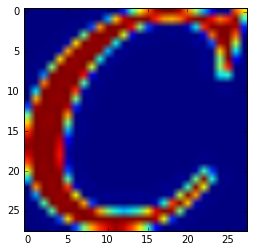

In [161]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
image_dataset = pickle.load(open(train_datasets[2],'rb'))
print(image_dataset.shape)
print(image_dataset[1].shape)
#print(image_dataset[1])
#plt.imshow(image_dataset[1])



---
Problem 3
---------
Another check: we expect the data to be balanced across classes. Verify that.

---

In [145]:
counts = []
for item in train_datasets:
    data_tmp = pickle.load(open(item, 'rb'))
    counts.append((item.split('/')[-1][0],data_tmp.shape[0]))
total = sum([item[1] for item in counts])
for item in counts:
    print(item[0], item[1], round(item[1]/total,4))

A 52909 0.1
B 52911 0.1
C 52912 0.1
D 52911 0.1
E 52912 0.1
F 52912 0.1
G 52912 0.1
H 52912 0.1
I 52912 0.1
J 52911 0.1


Merge and prune the training data as needed. Depending on your computer setup, you might not be able to fit it all in memory, and you can tune `train_size` as needed. The labels will be stored into a separate array of integers 0 through 9.

Also create a validation dataset for hyperparameter tuning.

In [149]:
def make_arrays(nb_rows, img_size):
    if nb_rows:
        dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
        labels = np.ndarray(nb_rows, dtype=np.int32)
    else:
        dataset, labels = None, None
    return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
    num_classes = len(pickle_files)
    valid_dataset, valid_labels = make_arrays(valid_size, image_size)
    train_dataset, train_labels = make_arrays(train_size, image_size)
    vsize_per_class = valid_size // num_classes
    tsize_per_class = train_size // num_classes
    
    start_v, start_t = 0, 0
    end_v, end_t = vsize_per_class, tsize_per_class
    end_l = vsize_per_class+tsize_per_class
    for label, pickle_file in enumerate(pickle_files):       
        try:
            with open(pickle_file, 'rb') as f:
                letter_set = pickle.load(f)
                # let's shuffle the letters to have random validation and training set
                np.random.shuffle(letter_set)
                if valid_dataset is not None:
                    valid_letter = letter_set[:vsize_per_class, :, :]
                    valid_dataset[start_v:end_v, :, :] = valid_letter
                    valid_labels[start_v:end_v] = label
                    start_v += vsize_per_class
                    end_v += vsize_per_class

                train_letter = letter_set[vsize_per_class:end_l, :, :]
                train_dataset[start_t:end_t, :, :] = train_letter
                train_labels[start_t:end_t] = label
                start_t += tsize_per_class
                end_t += tsize_per_class
        except Exception as e:
            print('Unable to process data from', pickle_file, ':', e)
            raise
    
    return valid_dataset, valid_labels, train_dataset, train_labels
            
            
train_size = 200000
valid_size = 10000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
  train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (200000, 28, 28) (200000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)


Next, we'll randomize the data. It's important to have the labels well shuffled for the training and test distributions to match.

In [150]:
def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation,:,:]
    shuffled_labels = labels[permutation]
    return shuffled_dataset, shuffled_labels

train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

---
Problem 4
---------
Convince yourself that the data is still good after shuffling!

---

(200000, 28, 28)
(200000,)
(10000, 28, 28)
(10000,)
(10000, 28, 28)
(10000,)
3


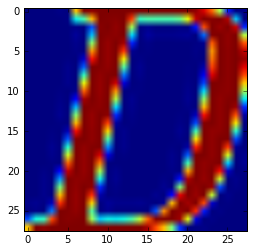

In [180]:
print(train_dataset.shape)
print(train_labels.shape)
print(test_dataset.shape)
print(test_labels.shape)
print(valid_dataset.shape)
print(valid_labels.shape)

'''A:0, B:1, C:2, D:3, E:4, F:5, G:6, H:7, I:8, J:9 '''
i = 298
print(train_labels[i])
plt.imshow(train_dataset[i])

Finally, let's save the data for later reuse:

In [183]:
pickle_file = os.path.join(data_root, 'notMNIST.pickle')

try:
    f = open(pickle_file, 'wb')
    save = {
        'train_dataset': train_dataset,
        'train_labels': train_labels,
        'valid_dataset': valid_dataset,
        'valid_labels': valid_labels,
        'test_dataset': test_dataset,
        'test_labels': test_labels,
    }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise

In [0]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 718193801


---
Problem 5
---------

By construction, this dataset might contain a lot of overlapping samples, including training data that's also contained in the validation and test set! Overlap between training and test can skew the results if you expect to use your model in an environment where there is never an overlap, but are actually ok if you expect to see training samples recur when you use it.
Measure how much overlap there is between training, validation and test samples.

Optional questions:
- What about near duplicates between datasets? (images that are almost identical)
- Create a sanitized validation and test set, and compare your accuracy on those in subsequent assignments.
---

array([4, 9, 6, ..., 2, 4, 4], dtype=int32)

---
Problem 6
---------

Let's get an idea of what an off-the-shelf classifier can give you on this data. It's always good to check that there is something to learn, and that it's a problem that is not so trivial that a canned solution solves it.

Train a simple model on this data using 50, 100, 1000 and 5000 training samples. Hint: you can use the LogisticRegression model from sklearn.linear_model.

Optional question: train an off-the-shelf model on all the data!

---

In [258]:
n_sample = 5000
X_train = [item_train.reshape(-1,28*28).squeeze() for item_train in train_dataset][:n_sample]
X_validate = [item_validate.reshape(-1, 28*28).squeeze() for item_validate in valid_dataset]
X_test = [item_test.reshape(-1, 28*28).squeeze() for item_test in test_dataset]

y_train = np.squeeze(train_labels[:n_sample])
y_test = test_labels.squeeze()
y_validate = valid_labels.squeeze()

In [259]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2')

clf.fit(X_train, y_train)
print(clf.score(X_validate, y_validate))

0.7742


In [260]:
from sklearn.metrics import f1_score
y_pred = clf.predict(X_test)
f1 = f1_score(y_pred, y_test, average='macro')
f1

0.8532131670729475